In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [931]:
formations = pd.read_csv("formations_df_for_clustering.csv")
formations = formations.drop('receivers_receivers', axis=1)
print(formations)

      qb  rb  wr  te  ol  shotgun  backFormation  receiverFormation  \
0      1   1   3   1   5     True             22                  5   
1      1   1   3   1   5     True             21                  5   
2      1   1   3   1   5     True             21                 16   
3      1   1   3   1   5     True             21                 11   
4      1   1   3   1   5     True             21                 11   
...   ..  ..  ..  ..  ..      ...            ...                ...   
2995   1   1   3   1   5    False              7                  2   
2996   1   1   3   1   5    False              7                 19   
2997   1   1   3   1   5     True             21                 11   
2998   1   1   1   3   5    False             24                  1   
2999   1   1   2   2   5    False              7                  2   

      formationCode  wide_left  ...  full_house_backfield  singleback  pistol  \
0            120010        1.0  ...                     1         

In [687]:
formations.columns

Index(['qb', 'rb', 'wr', 'te', 'ol', 'shotgun', 'backFormation',
       'receiverFormation', 'formationCode', 'wide_left', 'slot_left',
       'tight_left', 'tight_right', 'slot_right', 'wide_right', 'hash',
       'noHuddle', 'wr_motion', 'rb_motion', 'te_motion', 'personnel', 'heavy',
       'empty_backfield', 'rb_split', 'te_split', 'special',
       'receivers_on_short_side', 'spread_index', 'te_spread_index',
       'rb_spread_index', 'heavy_index', 'te_heavy_index', 'tight_balance',
       'spread_balance', 'motion_load', 'fake_empty',
       'empty_backfield_on_hash', 'wr_motion_toward_short_side',
       'te_motion_toward_short_side', 'wr_compressed', 'noHuddle_spread_index',
       'shotgun_when_spread', 'wr_spread_index', 'false_heavy',
       'noHuddle_heavy_index', 'rb_heavy_index', 'spread_and_heavy',
       'shotgun_when_heavy', 'spread_versus_tight_balance',
       'motion_and_balance', 'motion_and_spread', 'te_split_balance',
       'motion_heaviness_ratio', 'motion_spr

# Kmeans Clustering

In [932]:
#categorical_features = [
    #'backFormation',
    #'receiverFormation'
#]

boolean_features = [
    'shotgun',
    'noHuddle',
    'wr_motion',
    'te_motion',
    'rb_motion',
    'has_twins',
    'has_trips',
    'has_quads',
    'has_bunch',
    'is_goal_line',
    'empty_back',
    'split_backs', 
    'Iform', 
    'full_house_backfield', 
    'singleback', 
    'pistol',
    'wildcat', 
    'wing', 
    'shotgun_rb', 
    'sniffer',
    'rb_split',
    'te_split'
]

features_to_scale = [
    'qb',
    'rb',
    'te',
    'wr',
    'ol',
    'spread_index', # leave in to contextualize the alignment features that might be read in vacuum
    'spread_balance',
    'tight_balance',
    'receivers_on_short_side'
]

In [933]:
from sklearn.preprocessing import MinMaxScaler

features_to_keep = boolean_features + features_to_scale
X = formations[features_to_keep].copy()

X[boolean_features] = X[boolean_features].astype(int)
#X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
scaler = MinMaxScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

In [934]:
X.columns

Index(['shotgun', 'noHuddle', 'wr_motion', 'te_motion', 'rb_motion',
       'has_twins', 'has_trips', 'has_quads', 'has_bunch', 'is_goal_line',
       'empty_back', 'split_backs', 'Iform', 'full_house_backfield',
       'singleback', 'pistol', 'wildcat', 'wing', 'shotgun_rb', 'sniffer',
       'rb_split', 'te_split', 'qb', 'rb', 'te', 'wr', 'ol', 'spread_index',
       'spread_balance', 'tight_balance', 'receivers_on_short_side'],
      dtype='object')

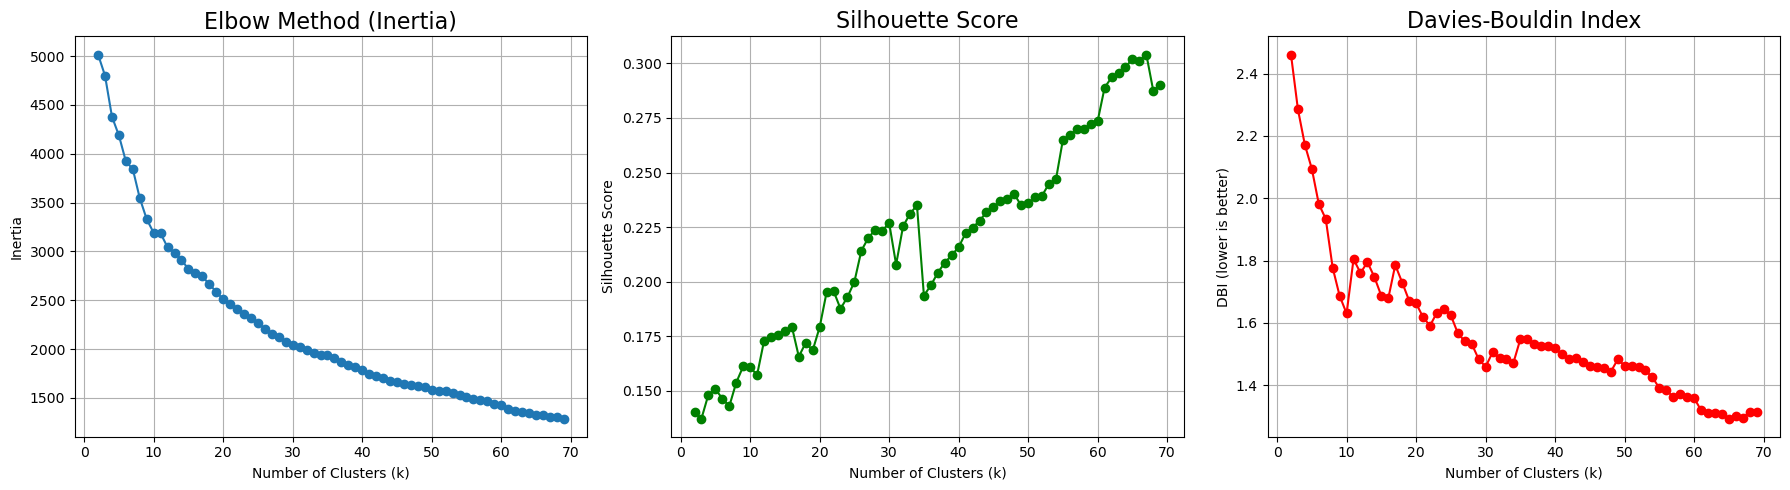

In [935]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

inertia = []
silhouette_scores = []
davies_bouldin_scores = []

k_range = range(2, 70)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method (Inertia)
axs[0].plot(k_range, inertia, marker='o')
axs[0].set_title('Elbow Method (Inertia)', fontsize=16)
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Silhouette Score
axs[1].plot(k_range, silhouette_scores, marker='o', color='green')
axs[1].set_title('Silhouette Score', fontsize=16)
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

# Davies-Bouldin Index
axs[2].plot(k_range, davies_bouldin_scores, marker='o', color='red')
axs[2].set_title('Davies-Bouldin Index', fontsize=16)
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('DBI (lower is better)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [936]:
optimal_k = 34
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_cluster = X.copy()
kmeans_labels = kmeans.fit_predict(X_cluster)

In [937]:
from sklearn.metrics import pairwise_distances_argmin_min
closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_cluster)
representative_rows_wo_personnel = formations.iloc[closest_indices]
print(representative_rows_wo_personnel)

      qb  rb  wr  te  ol  shotgun  backFormation  receiverFormation  \
2072   1   1   2   2   5     True             21                  2   
98     1   1   3   1   5     True             21                 11   
1231   1   1   3   1   5     True             29                 10   
485    1   1   2   2   5     True             21                 16   
1172   1   1   3   1   5     True             22                 10   
8      1   1   3   1   5     True             22                  6   
2099   1   1   2   1   6     True             22                 16   
371    1   1   3   1   5     True              2                 16   
1588   1   1   3   1   5     True              1                 10   
654    1   1   3   1   5     True             22                  3   
1010   1   1   2   2   5     True             26                 16   
2426   1   2   2   1   5    False             19                 16   
2406   1   1   3   1   5     True             22                 11   
0     

In [994]:
representative_rows_wo_personnel = formations.iloc[closest_indices].copy()
representative_rows_wo_personnel['kmeans_cluster'] = range(kmeans.n_clusters)
representative_rows_wo_personnel.to_csv("representative_formations.csv", index=False)

In [938]:
X['kmeans_cluster'] = kmeans_labels
formations_clustered = formations.copy()
formations_clustered['kmeans_cluster'] = kmeans_labels

In [939]:
cluster_counts = X['kmeans_cluster'].value_counts().reset_index()
cluster_counts.columns = ['kmeans_cluster', 'count']
print(cluster_counts)

    kmeans_cluster  count
0                7    199
1                4    193
2                6    181
3                3    159
4               12    156
5                1    132
6               25    122
7               17    119
8                5    111
9               22    103
10              14    102
11               9     96
12              28     95
13              23     95
14               8     90
15              32     88
16              11     77
17              10     77
18              21     67
19              19     67
20              16     62
21              26     62
22              20     60
23              33     58
24              13     57
25              30     50
26               0     49
27              18     47
28              24     47
29              29     45
30              27     40
31               2     34
32              15     31
33              31     29


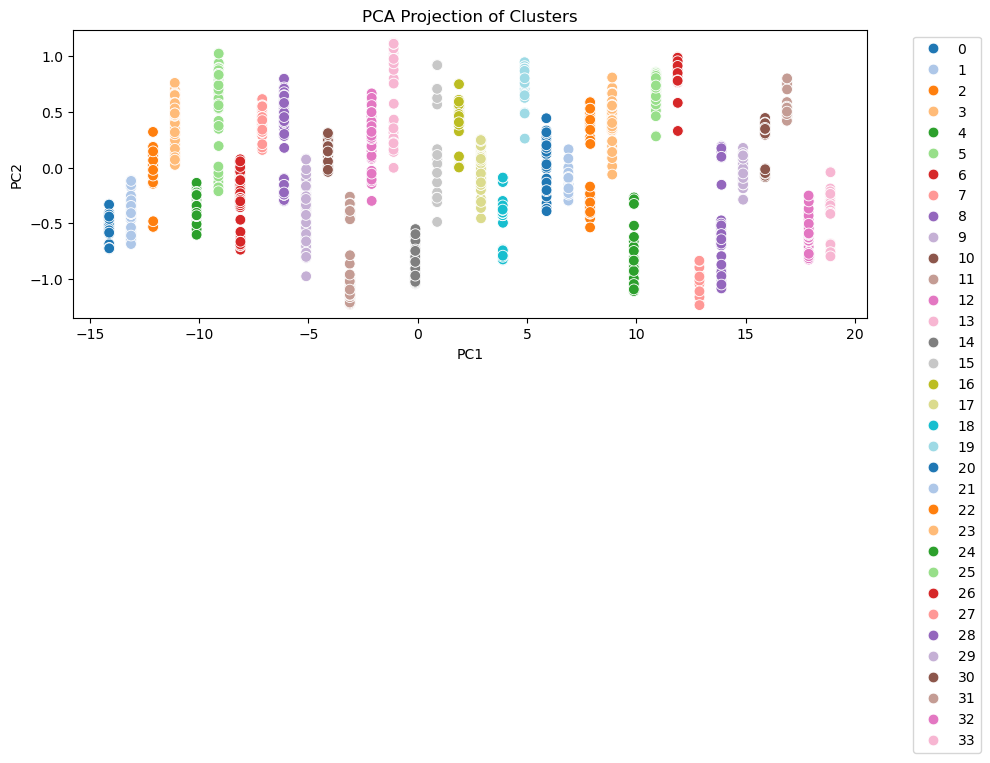

In [897]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_viz = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca_viz, columns=['PC1', 'PC2'])
pca_df['kmeans_cluster'] = X['kmeans_cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='tab20', s=60)
plt.title('PCA Projection of Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

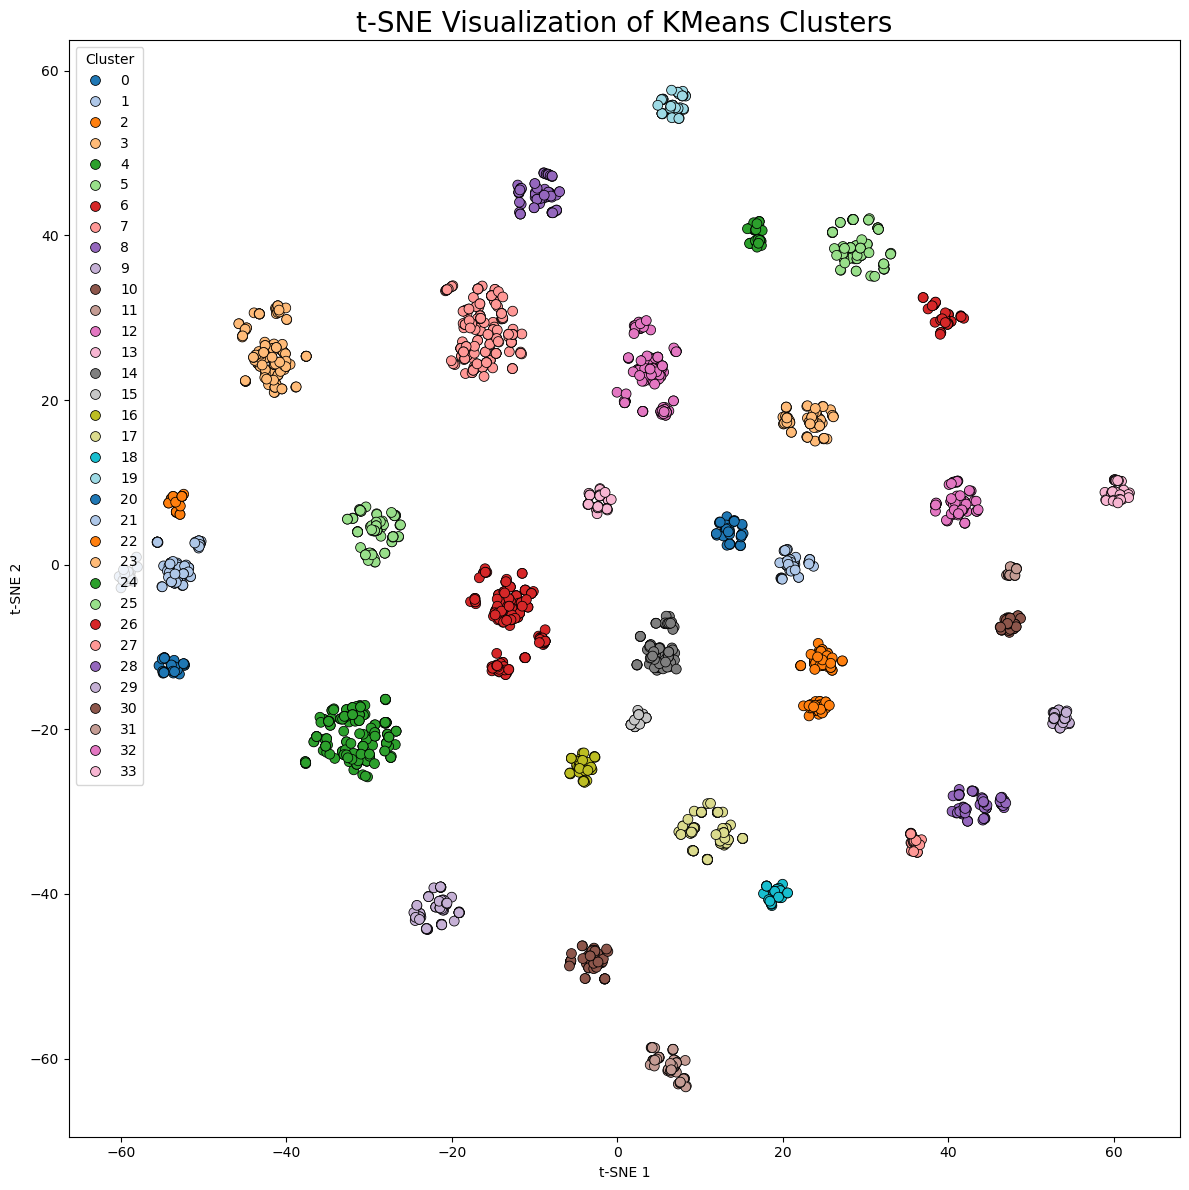

In [942]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 12))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X['kmeans_cluster'], palette='tab20', s=50, edgecolor='k')
plt.title("t-SNE Visualization of KMeans Clusters", fontsize=20)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [941]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, X['kmeans_cluster'])
print(f'Overall Silhouette Score: {sil_score:.4f}')

Overall Silhouette Score: 0.5044


In [943]:
from sklearn.metrics import silhouette_samples

sample_silhouette_values = silhouette_samples(X, X['kmeans_cluster'])

# Aggregate by cluster
X['silhouette'] = sample_silhouette_values
cluster_silhouette_scores = X.groupby('kmeans_cluster')['silhouette'].mean().sort_values(ascending=False)

print("Silhouette Score by Cluster:")
print(cluster_silhouette_scores)

Silhouette Score by Cluster:
kmeans_cluster
30    0.681459
4     0.635228
14    0.618215
16    0.613551
7     0.605771
33    0.604167
31    0.583195
19    0.564018
18    0.563801
10    0.559180
29    0.557248
22    0.538909
12    0.537686
27    0.537078
13    0.527968
32    0.526240
23    0.525836
9     0.510952
0     0.504498
24    0.495532
1     0.485007
21    0.478803
3     0.478285
2     0.455348
26    0.447088
6     0.444232
15    0.428684
28    0.426715
17    0.415032
25    0.408352
11    0.396652
20    0.390258
5     0.344564
8     0.279088
Name: silhouette, dtype: float64


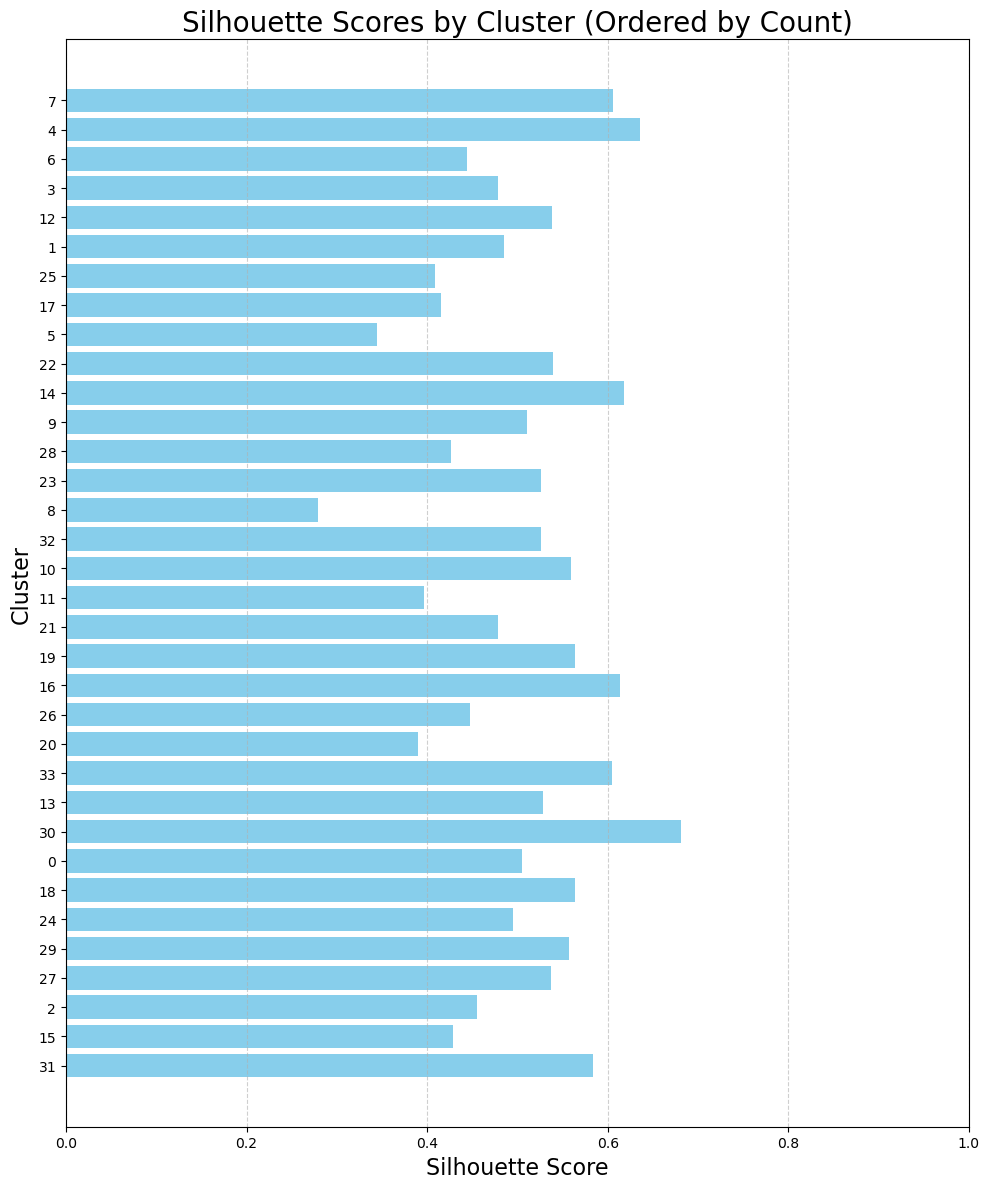

In [944]:
merged = pd.merge(cluster_counts, cluster_silhouette_scores, on='kmeans_cluster')
merged_sorted = merged.sort_values('count', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(
    y=merged_sorted['kmeans_cluster'].astype(str),
    width=merged_sorted['silhouette'],
    color='skyblue'
)
plt.xlabel("Silhouette Score", fontsize=16)
plt.ylabel("Cluster", fontsize=16)
plt.title("Silhouette Scores by Cluster (Ordered by Count)", fontsize=20)
plt.gca().invert_yaxis()
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [902]:
formations_clustered['formationId'] = formations_clustered.index.astype(int)

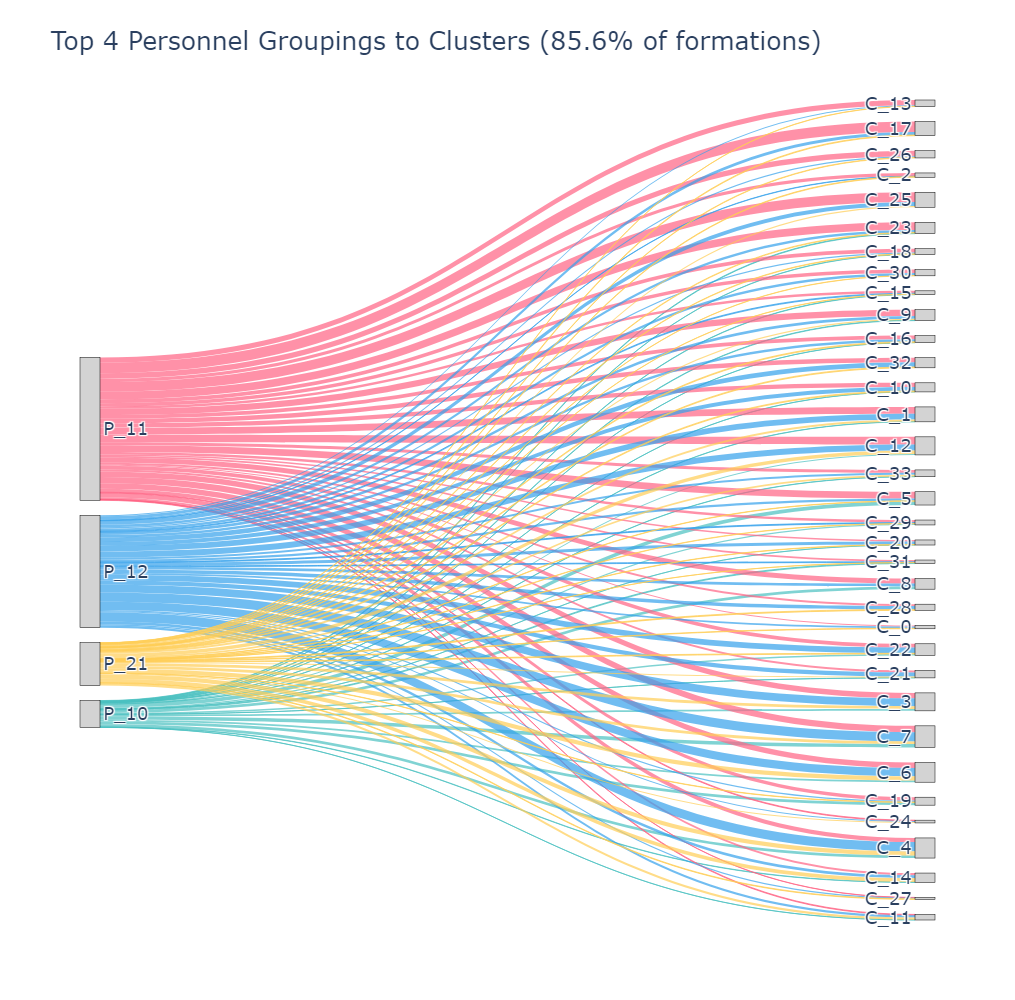

In [958]:
# bipartite graphic between clusters and personnel

import pandas as pd
import plotly.graph_objects as go

# Step 1: Load your dataframes (replace with your actual loading code)
raw_formations = pd.read_csv("formations_df_for_clustering.csv")

# Step 2: Merge the two to get personnel + cluster per formation
merged_df = pd.merge(raw_formations, formations_clustered[['kmeans_cluster']], left_index=True, right_index=True, how='inner')

# Step 3: Filter to top 4 personnel groupings you want
top_personnel = ['11', '12', '21', '10']
filtered_df = merged_df[merged_df['personnel'].isin(top_personnel)].copy()

# Step 4: Add label prefixes to avoid overlap in Sankey
filtered_df['personnel_label'] = 'P_' + filtered_df['personnel']
filtered_df['cluster_label'] = 'C_' + filtered_df['kmeans_cluster'].astype(str)

# Step 5: Count flows from personnel to cluster
flow_counts = filtered_df.groupby(['personnel', 'personnel_label', 'cluster_label']).size().reset_index(name='count')

# Step 6: Build unique node lists
personnel_nodes = sorted(flow_counts['personnel_label'].unique())
cluster_nodes = sorted(flow_counts['cluster_label'].unique())
all_nodes = personnel_nodes + cluster_nodes

# Step 7: Map labels to Sankey indices
label_to_index = {label: i for i, label in enumerate(all_nodes)}

# Step 8: Define personnel colors
personnel_colors = {
    '11': 'rgba(255, 99, 132, 0.7)',  # red
    '12': 'rgba(54, 162, 235, 0.7)',  # blue
    '21': 'rgba(255, 206, 86, 0.7)',  # yellow
    '10': 'rgba(75, 192, 192, 0.7)',  # teal
}

# Step 9: Build Sankey inputs
source = flow_counts['personnel_label'].map(label_to_index).tolist()
target = flow_counts['cluster_label'].map(label_to_index).tolist()
value = flow_counts['count'].tolist()
color = flow_counts['personnel'].map(personnel_colors).tolist()

# Step 10: Create hover text for cluster nodes (incoming flows)
cluster_hover_text = []
for cluster_label in cluster_nodes:
    df_sub = flow_counts[flow_counts['cluster_label'] == cluster_label]
    personnel_flows = [f"{row['personnel']}: {row['count']}" for _, row in df_sub.iterrows()]
    hover_text = "Incoming from personnel:<br>" + "<br>".join(personnel_flows) if personnel_flows else "No incoming flows"
    cluster_hover_text.append(hover_text)

# Step 11: Create hover text for personnel nodes (outgoing flows)
personnel_hover_text = []
for personnel_label in personnel_nodes:
    df_sub = flow_counts[flow_counts['personnel_label'] == personnel_label]
    cluster_flows = [f"{row['cluster_label']}: {row['count']}" for _, row in df_sub.iterrows()]
    hover_text = "Flows to clusters:<br>" + "<br>".join(cluster_flows) if cluster_flows else "No outgoing flows"
    personnel_hover_text.append(hover_text)

# Step 12: Combine hover text for all nodes in order
all_hover_text = personnel_hover_text + cluster_hover_text

# Step 13: Create Sankey diagram with hover info
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["lightgray"] * len(all_nodes),
        customdata=all_hover_text,
        hovertemplate='%{customdata}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=color,
        hoverinfo='none'
    )
)])

# Step 14: Layout update for better spacing
fig.update_layout(
    title_text="Top 4 Personnel Groupings to Clusters (85.6% of formations)",
    font_size=18,
    width=1000,
    height=1000
)

fig.show()

In [919]:
clustered_forms = formations_clustered.copy()

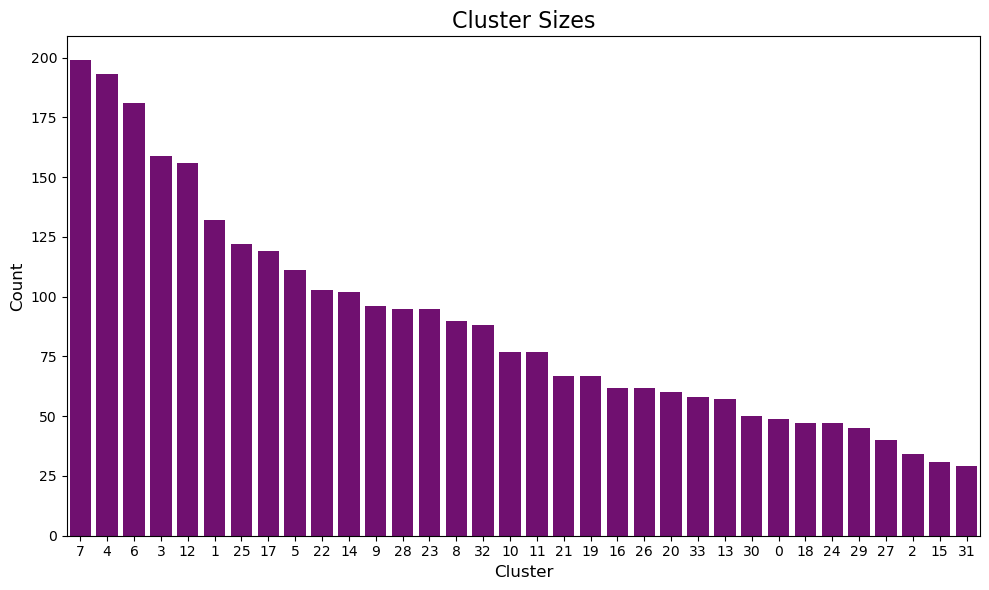

In [905]:
cluster_order = clustered_forms['kmeans_cluster'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

sns.countplot(data=clustered_forms, x='kmeans_cluster', order=cluster_order, color='purple')
plt.title('Cluster Sizes', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [906]:
from sklearn.tree import DecisionTreeClassifier

#categorical_features = ['backFormation', 'receiverFormation']
X = clustered_forms[boolean_features + features_to_scale].copy()
#X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

y = clustered_forms['kmeans_cluster']

clf = DecisionTreeClassifier()
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

wr_motion                  0.121129
shotgun                    0.100763
te_split                   0.099246
noHuddle                   0.070555
Iform                      0.066664
has_trips                  0.066321
split_backs                0.063049
rb_motion                  0.051899
has_twins                  0.050423
te_motion                  0.046832
rb_split                   0.042629
pistol                     0.037347
spread_balance             0.036655
full_house_backfield       0.036500
spread_index               0.034730
empty_back                 0.033786
singleback                 0.032843
te                         0.002245
is_goal_line               0.001949
rb                         0.001662
qb                         0.001303
has_bunch                  0.000661
wr                         0.000462
receivers_on_short_side    0.000346
sniffer                    0.000000
shotgun_rb                 0.000000
ol                         0.000000
wing                       0

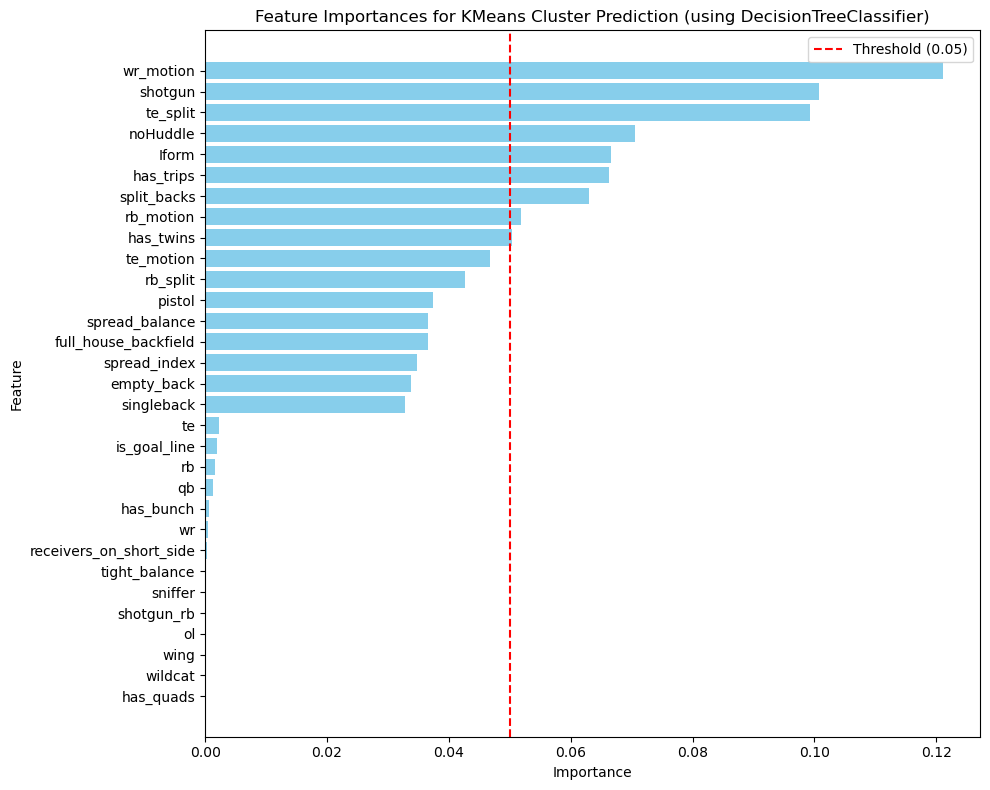

In [907]:
import matplotlib.pyplot as plt

top_importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_importances.index, top_importances.values, color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Threshold (0.05)')

plt.title('Feature Importances for KMeans Cluster Prediction (using DecisionTreeClassifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

Permutation Importances:
noHuddle                   0.428133
wr_motion                  0.266800
pistol                     0.256700
te_split                   0.193500
shotgun                    0.148900
te_motion                  0.117733
has_trips                  0.112867
Iform                      0.110400
has_twins                  0.066033
rb_motion                  0.064167
split_backs                0.059300
spread_balance             0.056367
rb_split                   0.047433
spread_index               0.042700
empty_back                 0.037167
full_house_backfield       0.034900
singleback                 0.024100
te                         0.001867
is_goal_line               0.001500
rb                         0.001467
qb                         0.001367
has_bunch                  0.000767
wr                         0.000400
receivers_on_short_side    0.000267
sniffer                    0.000000
wing                       0.000000
ol                         0.000000
wil

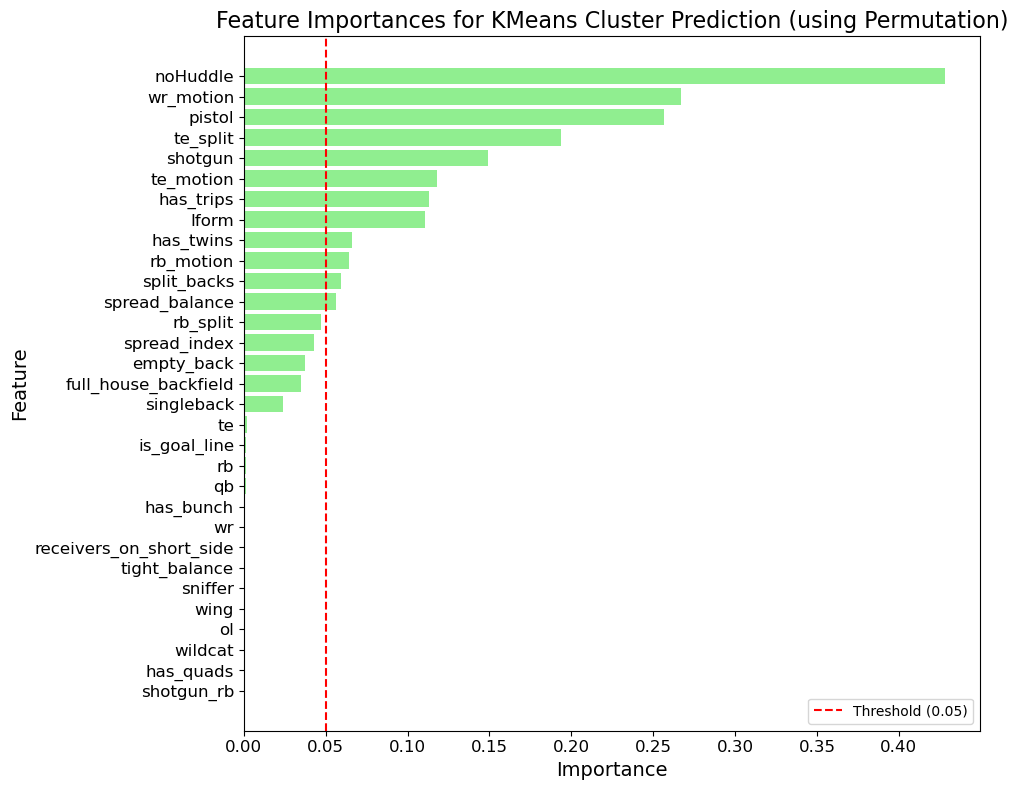

In [929]:
from sklearn.inspection import permutation_importance

# Compute permutation importances
perm_importance = permutation_importance(clf, X, y, n_repeats=10, random_state=42)

perm_importance_series = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Permutation Importances:")
print(perm_importance_series)

import matplotlib.pyplot as plt

top_importances = perm_importance_series.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_importances.index, top_importances.values, color='lightgreen')
plt.axvline(x=0.05, color='red', linestyle='--', label='Threshold (0.05)')

plt.title('Feature Importances for KMeans Cluster Prediction (using Permutation)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

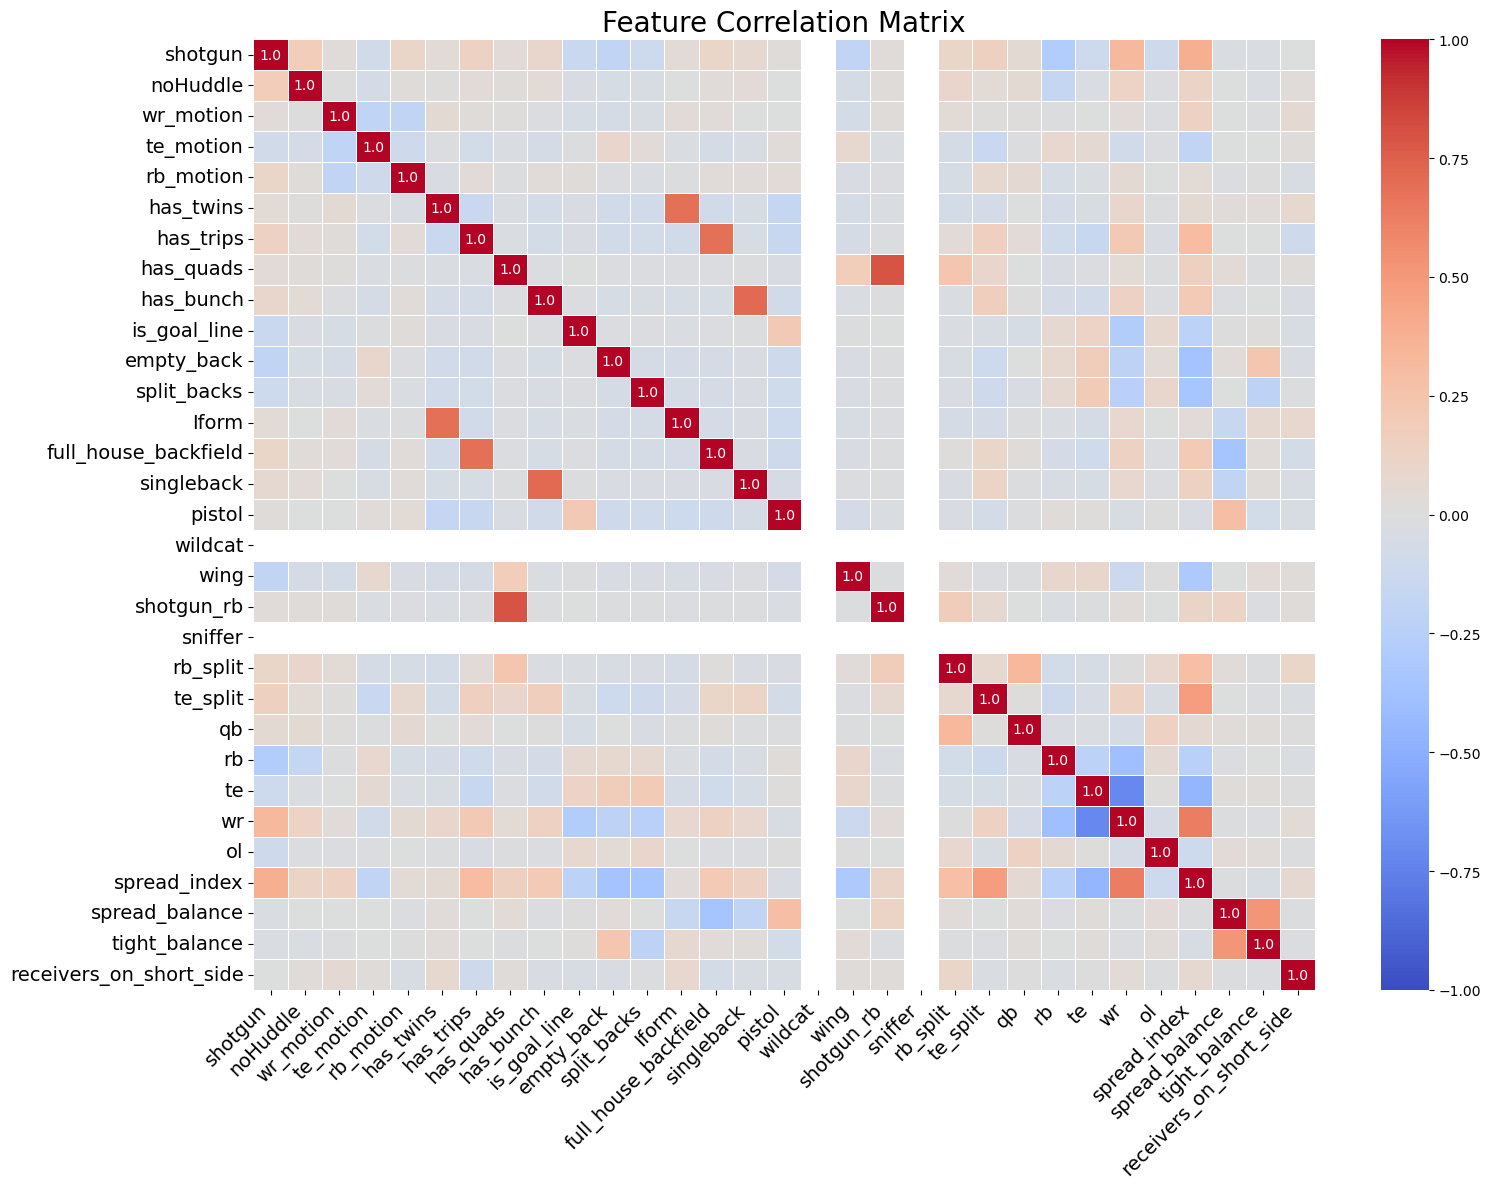

In [927]:
# Calculate correlation matrix
corr = X.corr()

# Create a mask with only values > 0.8 or < -0.8
annot = corr.where((corr > 0.8) | (corr < -0.8)).round(2).astype(str)
annot = annot.mask(annot == "nan", "")

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=annot, fmt='', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Formatting
plt.title("Feature Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

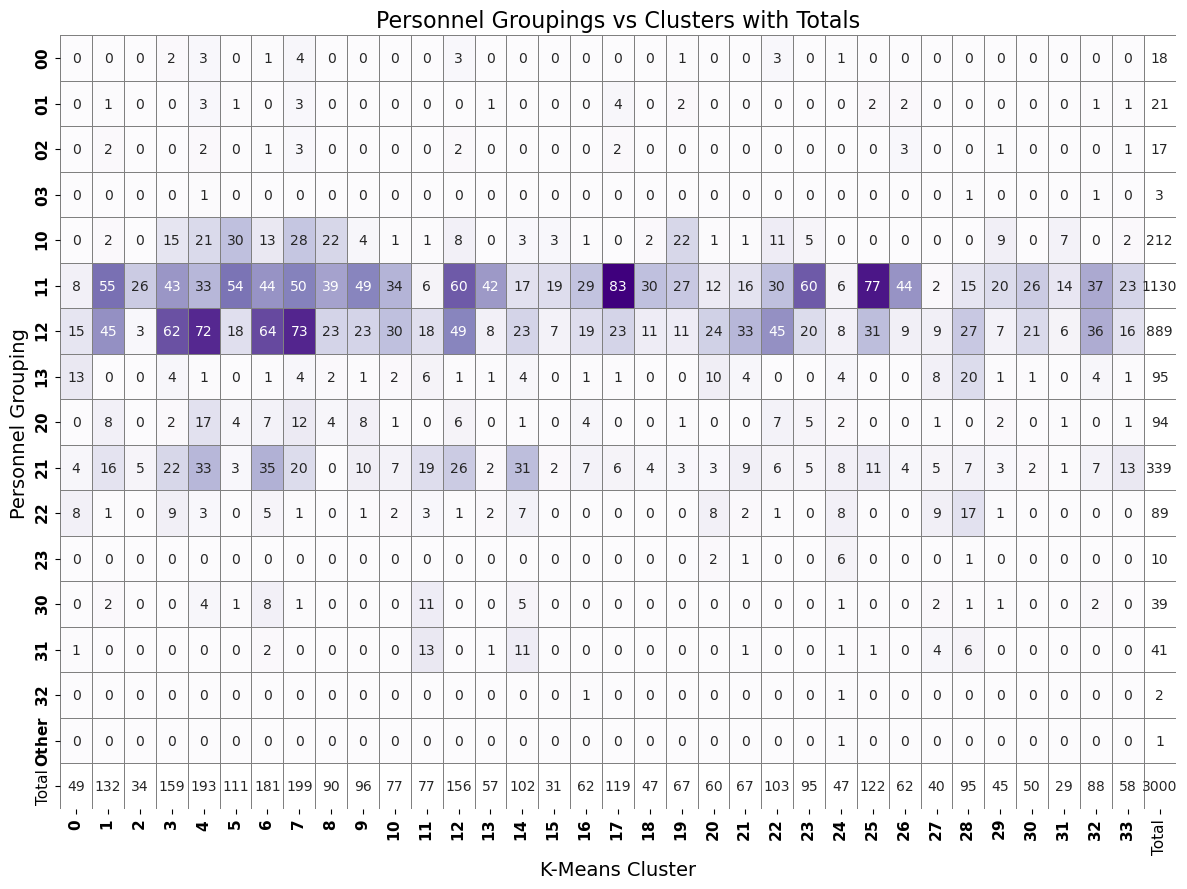

In [997]:
# Create crosstab
heat_data = pd.crosstab(merged_df['personnel'], merged_df['kmeans_cluster'])

# Add totals
heat_data['Total'] = heat_data.sum(axis=1)
total_row = heat_data.sum(axis=0)
heat_data.loc['Total'] = total_row

# Create mask (mask only the totals)
mask = pd.DataFrame(False, index=heat_data.index, columns=heat_data.columns)
mask.loc['Total', :] = True
mask.loc[:, 'Total'] = True

plt.figure(figsize=(12, 9))

sns.heatmap(
    heat_data,
    annot=True,
    fmt='d',
    cmap='Purples',
    linewidths=0.5,
    linecolor='gray',
    mask=mask,
    cbar=False,
)

# Overlay the totals (uncolored but annotated)
sns.heatmap(
    heat_data,
    annot=True,
    fmt='d',
    cmap=sns.color_palette(["white"]),
    linewidths=0.5,
    linecolor='gray',
    mask=~mask,
    cbar=False
)

# Title and labels
plt.title("Personnel Groupings vs Clusters with Totals", fontsize=16)
plt.xlabel("K-Means Cluster", fontsize=14)
plt.ylabel("Personnel Grouping", fontsize=14)

# Set axis ticks
ax = plt.gca()

# Bold non-total x-axis tick labels
x_labels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(
    [f"$\\bf{{{label}}}$" if label != 'Total' else label for label in x_labels],
    rotation=90,
    fontsize=11
)

# Bold non-total y-axis tick labels
y_labels = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(
    [f"$\\bf{{{label}}}$" if label != 'Total' else label for label in y_labels],
    fontsize=11
)

plt.tight_layout()
plt.show()

# Connecting FormationId to Original Presnap Data

In [975]:
presnap_2022 = pd.read_csv("SIS_NCAAF_Presnap_Offense_Sample_2022_Week1.csv")
participation_2022 = pd.read_csv("SIS_NCAAF_Participation_Offense_Sample_2022_Week1.csv")
plays_2022 = pd.read_csv("SIS_NCAAF_Events_Sample_2022_Week1.csv")

In [661]:
presnap_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'teamId', 'qb', 'rb', 'wr', 'te',
       'ol', 'blockingSchemeType', 'blownBlockPlayer', 'blownBlockPlayer2',
       'blownBlockPlayer3', 'shotgun', 'noHuddle', 'abortedSnap', 'snapper',
       'playAction', 'readOption', 'backFormation', 'receiverFormation',
       'formationCode', 'lastUpdate', 'badSnap', 'badCatch'],
      dtype='object')

In [385]:
participation_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'playerId', 'playerName',
       'positionCategory', 'positionSubCategory', 'sideOfCenter', 'listOrder',
       'isBlocking', 'isInMotion', 'routeType', 'routeName', 'motionType',
       'lastUpdate', 'isOnBall', 'cutBlock', 'pullType'],
      dtype='object')

In [977]:
plays_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'eventType', 'offensiveTeamId',
       'defensiveTeamId', 'quarter', 'down', 'toGo', 'timeLeft', 'driveId',
       'fieldPos', 'hash', 'homeTeamId', 'awayTeamId', 'homeTeamScore',
       'awayTeamScore', 'scoreGap', 'scoreType', 'huddle', 'snap',
       'stoppedClock', 'homeTeamTimeoutsLeft', 'awayTeamTimeoutsLeft',
       'homeTeamChallengesLeft', 'awayTeamChallengesLeft', 'challengeType',
       'startYard', 'offensivePenalty', 'offensivePenaltyType',
       'offensivePenaltyPlayer', 'drewOffensivePenaltyPlayer',
       'offensivePenaltyDeclined', 'offensivePenaltyYardsGained',
       'defensivePenalty', 'defensivePenaltyType', 'defensivePenaltyPlayer',
       'defensivePenaltyDeclined', 'defensivePenaltyYardsGained',
       'defensivePenaltyYardsSpot', 'offensivePenaltyYardsSpot',
       'officialYardageAdjustment', 'playType', 'firstDown', 'fieldGoal',
       'touchdown', 'extraPoint', 'twoPtConversion', 'twoPtReturn', 'safety',
       

In [978]:
# Merge hash from plays_2022 into presnap_2022
presnap_2022 = presnap_2022.merge(
    plays_2022[['gameId', 'eventId', 'hash']],
    on=['gameId', 'eventId'],
    how='left' 
)

presnap_2022.shape

(11561, 27)

In [979]:
# indicating motion by position

participation_2022["wr_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"].isin(["WR", "SWR"])
)

participation_2022["te_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"] == "TE"
)

participation_2022["rb_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"].str.startswith("B")
)

motion_flags = (
    participation_2022
    .groupby(["gameId", "eventId"])[["wr_motion", "te_motion", "rb_motion"]]
    .any()
    .reset_index()
)

presnap_2022 = presnap_2022.merge(
    motion_flags,
    how="left",
    on=["gameId", "eventId"]
)

presnap_2022[["wr_motion", "te_motion", "rb_motion"]] = presnap_2022[
    ["wr_motion", "te_motion", "rb_motion"]
].fillna(False)

In [980]:
def safe_formationCode_split(code):
    try:
        code_str = str(int(code)).zfill(6)  # ensure numeric, then pad to 6 digits if needed
        return pd.Series(list(code_str)).astype(int)
    except:
        return pd.Series([np.nan]*6) # if not numeric, store nan for 6 new varaibles below

presnap_2022[['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right']] = presnap_2022['formationCode'].apply(safe_formationCode_split)
presnap_2022.dropna(subset=['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right'], inplace=True)

In [981]:
def assign_personnel(row):
    if row['rb'] == 1 and row['te'] == 0:
        return '10'
    elif row['rb'] == 1 and row['te'] == 1:
        return '11'
    elif row['rb'] == 1 and row['te'] == 2:
        return '12'
    elif row['rb'] == 1 and row['te'] == 3:
        return '13'
    elif row['rb'] == 2 and row['te'] == 0:
        return '20'
    elif row['rb'] == 2 and row['te'] == 1:
        return '21'
    elif row['rb'] == 2 and row['te'] == 2:
        return '22'
    elif row['rb'] == 0 and row['te'] == 0:
        return '00'
    elif row['rb'] == 2 and row['te'] == 3:
        return '23'
    elif row['rb'] == 0 and row['te'] == 1:
        return '01'
    elif row['rb'] == 0 and row['te'] == 2:
        return '02'
    elif row['rb'] == 0 and row['te'] == 3:
        return '03'
    elif row['rb'] == 0 and row['te'] == 4:
        return '04'
    elif row['rb'] == 3 and row['te'] == 0:
        return '30'
    elif row['rb'] == 3 and row['te'] == 1:
        return '31'
    elif row['rb'] == 3 and row['te'] == 2:
        return '32'
    else:
        return 'Other'

presnap_2022['personnel'] = presnap_2022.apply(assign_personnel, axis=1)

In [982]:
# replacing receiverFormation with boolean flags
presnap_2022['has_twins'] = presnap_2022['receiverFormation'].isin([3, 4]).astype(int)
presnap_2022['has_trips'] = presnap_2022['receiverFormation'].isin([5, 6]).astype(int)
presnap_2022['has_quads'] = presnap_2022['receiverFormation'].isin([20, 21]).astype(int)
presnap_2022['has_bunch'] = presnap_2022['receiverFormation'].isin([7, 8]).astype(int)
presnap_2022['has_tight_slot'] = presnap_2022['receiverFormation'].isin([12, 13]).astype(int)
presnap_2022['is_all_tight'] = (presnap_2022['receiverFormation'] == 19).astype(int)
presnap_2022['is_goal_line'] = (presnap_2022['receiverFormation'] == 14).astype(int)
presnap_2022['is_fake_or_aborted_fg_or_punt'] = presnap_2022['receiverFormation'].isin([17, 18, 22, 23]).astype(int)

# replacing backFormation with boolean flags to reduce feature density
presnap_2022['empty_back'] = (presnap_2022['receiverFormation'] == 1).astype(int)
presnap_2022['split_backs'] = (presnap_2022['receiverFormation'] == 2).astype(int)
presnap_2022['Iform'] = presnap_2022['receiverFormation'].isin([3, 23, 24]).astype(int)
presnap_2022['full_house_backfield'] = (presnap_2022['receiverFormation'] == 5).astype(int)
presnap_2022['singleback'] = (presnap_2022['receiverFormation'] == 7).astype(int)
presnap_2022['pistol'] = presnap_2022['receiverFormation'].isin([11, 14, 25, 26, 41, 42]).astype(int)
presnap_2022['wildcat'] = presnap_2022['receiverFormation'].isin([32, 33, 34, 35, 36, 39, 40]).astype(int)
presnap_2022['wing'] = presnap_2022['receiverFormation'].isin([18, 19, 20]).astype(int)
presnap_2022['shotgun_rb'] = presnap_2022['receiverFormation'].isin([21, 22, 27]).astype(int)
presnap_2022['sniffer'] = presnap_2022['receiverFormation'].isin([28, 29, 30, 31]).astype(int)

presnap_2022['heavy'] = (presnap_2022['rb'] + presnap_2022['te'] >= 4)
presnap_2022['empty_backfield'] = (presnap_2022['rb'] == 0)

# Sum all alignment-based variables
align_vars = ['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right']
presnap_2022['total_aligned'] = presnap_2022[align_vars].sum(axis=1)
presnap_2022['total_skill'] = presnap_2022['rb'] + presnap_2022['wr'] + presnap_2022['te']

# True if all skill players are aligned and there’s at least one RB
presnap_2022['rb_split'] = (presnap_2022['rb'] > 0) & (presnap_2022['total_aligned'] == presnap_2022['total_skill'])

presnap_2022.drop(columns=['total_aligned', 'total_skill'], inplace=True)

presnap_2022['te_split'] = (
    (presnap_2022['te'] > 0) & 
    ((presnap_2022['tight_left'] + presnap_2022['tight_right']) == 0)
)

presnap_2022['receivers_left'] = presnap_2022['wide_left'] + presnap_2022['slot_left']
presnap_2022['receivers_right'] = presnap_2022['wide_right'] + presnap_2022['slot_right']

presnap_2022['special'] = (
    (presnap_2022['qb'] == 0) &
    (presnap_2022['rb'] == 0) &
    (presnap_2022['wr'] == 0) &
    (presnap_2022['te'] == 0)
)
presnap_2022["special"] = (
    (presnap_2022["special"] == 1) | 
    (presnap_2022['is_fake_or_aborted_fg_or_punt'] == 1) |
    (presnap_2022["backFormation"].isin([9, 10, 16, 17, 38]))
).astype(int)

# receivers on short side of field
left_receivers = ['wide_left', 'slot_left', 'tight_left']
right_receivers = ['wide_right', 'slot_right', 'tight_right']

presnap_2022['receivers_on_short_side'] = (
    presnap_2022.apply(
        lambda row: row[left_receivers].sum() if row['hash'] == 1 
        else (row[right_receivers].sum() if row['hash'] == 3 else 0),
        axis=1
    )
)

presnap_2022['spread_index'] = presnap_2022['wide_left'] + presnap_2022['slot_left'] + presnap_2022['slot_right'] + presnap_2022['wide_right']
presnap_2022['te_spread_index'] = presnap_2022['te'] * presnap_2022['spread_index']
presnap_2022['rb_spread_index'] = presnap_2022['rb'] * presnap_2022['spread_index']
presnap_2022['heavy_index'] = presnap_2022['rb'] + presnap_2022['te']
presnap_2022['te_heavy_index'] = presnap_2022['te'] * presnap_2022['heavy_index']
presnap_2022['tight_balance'] = presnap_2022['tight_right'] - presnap_2022['tight_left']

presnap_2022['spread_balance'] = (
    presnap_2022['wide_right'] + presnap_2022['slot_right'] + presnap_2022['tight_right']
    - presnap_2022['wide_left'] - presnap_2022['slot_left'] - presnap_2022['tight_left']
)

presnap_2022['motion_load'] = (
    presnap_2022['rb_motion'].astype(int) +
    presnap_2022['te_motion'].astype(int) +
    presnap_2022['wr_motion'].astype(int)
)

presnap_2022['fake_empty'] = (presnap_2022['empty_backfield'] == True) & (presnap_2022['rb_motion'] != 0)

presnap_2022['empty_backfield_on_hash'] = (
    presnap_2022['empty_backfield'] & presnap_2022['hash'].isin([1, 3])
).fillna(False)

presnap_2022['wr_motion_toward_short_side'] = presnap_2022['wr_motion'] * presnap_2022['receivers_on_short_side']
presnap_2022['te_motion_toward_short_side'] = presnap_2022['te_motion'] * presnap_2022['receivers_on_short_side']

presnap_2022['wr_compressed'] = (presnap_2022['wr'] > 3) & (presnap_2022['spread_index'] < 2)
presnap_2022['noHuddle_spread_index'] = presnap_2022['noHuddle'] * presnap_2022['spread_index']
presnap_2022['shotgun_when_spread'] = presnap_2022['shotgun'] * presnap_2022['spread_index']
presnap_2022['wr_spread_index'] = presnap_2022['wr'] * presnap_2022['spread_index']
presnap_2022['false_heavy'] = (presnap_2022['heavy_index'] > 2) & (presnap_2022['spread_index'] > 2)
presnap_2022['noHuddle_heavy_index'] = presnap_2022['noHuddle'] * presnap_2022['heavy_index']
presnap_2022['rb_heavy_index'] = presnap_2022['rb'] * presnap_2022['heavy_index']
presnap_2022['spread_and_heavy'] = presnap_2022['spread_index'] * presnap_2022['heavy_index']
presnap_2022['shotgun_when_heavy'] = presnap_2022['shotgun'] * presnap_2022['heavy_index']
presnap_2022['spread_versus_tight_balance'] = presnap_2022['tight_balance'] * presnap_2022['spread_balance']
presnap_2022['motion_and_balance'] = (presnap_2022['motion_load'] * presnap_2022['spread_balance']).abs()
presnap_2022['motion_and_tight'] = abs(presnap_2022['motion_load'] * presnap_2022['tight_balance'])
presnap_2022['motion_and_spread'] = presnap_2022['spread_index'] * presnap_2022['motion_load']
presnap_2022['te_split_balance'] = (presnap_2022['te_split'] * presnap_2022['spread_balance']).abs()
presnap_2022['motion_heaviness_ratio'] = presnap_2022['motion_load'] * presnap_2022['heavy_index']
presnap_2022['motion_spread_ratio'] = presnap_2022['wr_motion'] * presnap_2022['spread_index']
presnap_2022['formation_entropy'] = presnap_2022['motion_load'] * (1 + presnap_2022['spread_index']) * (presnap_2022['noHuddle'] + 1)

def count_empty_wide_side_zones(row):
    if row['hash'] == 1:  # Ball on left hash → wide side is RIGHT
        return sum([
            row['wide_right'] == 0,
            row['slot_right'] == 0,
            row['tight_right'] == 0
        ])
    elif row['hash'] == 3:  # Ball on right hash → wide side is LEFT
        return sum([
            row['wide_left'] == 0,
            row['slot_left'] == 0,
            row['tight_left'] == 0
        ])
    else:  # Middle hash
        return 0

presnap_2022['empty_zones_on_wide_side'] = presnap_2022.apply(count_empty_wide_side_zones, axis=1)

hash_map = {1: 0.0, 2: 0.5, 3: 1.0}  # normalize variable hash
presnap_2022['hash_spot'] = presnap_2022['hash'].map(hash_map)
presnap_2022['hash_spot'] = presnap_2022['hash_spot'].fillna(0.5)

# How much of the formation imbalance is toward wide or tight side of field?
# Positive value means imbalance toward wide side; negative is toward tight side
presnap_2022['field_mismatch'] = presnap_2022['spread_balance'] * (0.5 - presnap_2022['hash_spot'])
presnap_2022 = presnap_2022.drop(columns=['hash_spot'])

In [916]:
nan_counts_per_feature = presnap_2022.isna().sum()
print(nan_counts_per_feature)

season                           0
week                             0
gameId                           0
eventId                          0
teamId                           0
qb                               0
rb                               0
wr                               0
te                               0
ol                               0
blockingSchemeType               0
blownBlockPlayer                 0
blownBlockPlayer2                0
blownBlockPlayer3                0
shotgun                          0
noHuddle                         0
abortedSnap                      0
snapper                          0
playAction                       0
readOption                       0
backFormation                    0
receiverFormation                0
formationCode                    0
lastUpdate                       0
badSnap                          0
badCatch                         0
hash                             0
wr_motion                        0
te_motion           

In [983]:
print(presnap_2022)

       season  week  gameId  eventId  teamId  qb  rb  wr  te  ol  ...  \
0        2022     1    6222       10       3   1   1   3   1   5  ...   
1        2022     1    6222       15       3   1   1   3   1   5  ...   
2        2022     1    6222       20       3   1   1   3   1   5  ...   
3        2022     1    6222       25       3   1   1   3   1   5  ...   
4        2022     1    6222       30       3   1   1   3   1   5  ...   
...       ...   ...     ...      ...     ...  ..  ..  ..  ..  ..  ...   
11555    2022     1    6268      905      26   1   1   2   2   5  ...   
11556    2022     1    6268      915      26   1   1   2   2   5  ...   
11557    2022     1    6268      920      26   1   1   2   2   5  ...   
11558    2022     1    6268      925      26   1   1   2   2   5  ...   
11560    2022     1    6269       10     182   1   1   2   2   5  ...   

       spread_versus_tight_balance  motion_and_balance  motion_and_tight  \
0                             -0.0             

In [984]:
# Leave out hash because it was left out when dropping duplicates of formations

formation_features = [
    'qb', 'rb', 'wr', 'te', 'ol', 'shotgun', 'backFormation', 'receiverFormation',
    'wide_left', 'slot_left', 'tight_left', 'tight_right',
    'slot_right', 'wide_right', 'noHuddle', 'wr_motion', 'rb_motion',
    'te_motion'
]

In [918]:
clustered_forms = pd.read_csv('formations_clustered.csv')

In [985]:
# ensuring all features are accounted for

# Make formationCode a string type in both 
presnap_2022['formationCode'] = presnap_2022['formationCode'].astype(str)
clustered_forms['formationCode'] = clustered_forms['formationCode'].astype(str)

# Round float columns for alignment purposes
float_cols = presnap_2022.select_dtypes(include='float').columns
presnap_2022[float_cols] = presnap_2022[float_cols].round(3)
clustered_forms[float_cols] = clustered_forms[float_cols].round(3)

# Booleans to integers
bool_cols = ['shotgun', 'noHuddle', 'wr_motion', 'rb_motion', 'te_motion']
presnap_2022[bool_cols] = presnap_2022[bool_cols].astype(int)
clustered_forms[bool_cols] = clustered_forms[bool_cols].astype(int)

presnap_2022_with_ids = presnap_2022.merge(
    clustered_forms[['formationId', 'kmeans_cluster'] + formation_features],
    on=formation_features,
    how='left'
)

unmatched_pct = presnap_2022_with_ids['formationId'].isna().mean()
print(f"Unmatched rows (missing formationId): {unmatched_pct:.2%}")

Unmatched rows (missing formationId): 0.00%


In [780]:
feature_match_counts = {}

# Exclude formationId and kmeans_cluster if you want
exclude_cols = ['formationId', 'kmeans_cluster']

# Only keep columns present in both unmatched and clustered_forms
columns_to_check = [
    col for col in clustered_forms.columns
    if col not in exclude_cols and col in unmatched.columns
]

for feature in columns_to_check:
    matches = unmatched.merge(
        clustered_forms[[feature]].drop_duplicates(),
        on=feature,
        how='inner'
    )
    feature_match_counts[feature] = len(matches)

feature_match_df = pd.DataFrame.from_dict(feature_match_counts, orient='index', columns=['match_count'])
feature_match_df['unmatched_count'] = len(unmatched) - feature_match_df['match_count']
feature_match_df = feature_match_df.sort_values(by='unmatched_count', ascending=False)

print(feature_match_df)

                               match_count  unmatched_count
qb                                       0                0
motion_and_balance                       0                0
field_mismatch                           0                0
empty_zones_on_wide_side                 0                0
formation_entropy                        0                0
motion_spread_ratio                      0                0
motion_heaviness_ratio                   0                0
te_split_balance                         0                0
motion_and_spread                        0                0
spread_versus_tight_balance              0                0
has_twins                                0                0
shotgun_when_heavy                       0                0
spread_and_heavy                         0                0
rb_heavy_index                           0                0
noHuddle_heavy_index                     0                0
false_heavy                             

In [883]:
unique_rows = presnap_2022[formation_features].drop_duplicates()
num_unique = len(unique_rows)
print(f"Number of unique rows based on formation_features: {num_unique}")

Number of unique rows based on formation_features: 3000


In [782]:
matched = presnap_2022_with_ids[presnap_2022_with_ids['formationId'].notna()]
unmatched = presnap_2022_with_ids[presnap_2022_with_ids['formationId'].isna()]

feature_mismatch_summary = {}

for col in formation_features:
    matched_vals = set(matched[col].unique())
    unmatched_vals = set(unmatched[col].unique())
    
    # How many unmatched values are NOT in matched values?
    unmatched_only = unmatched_vals - matched_vals
    
    # Count how many unmatched rows have these unmatched-only values
    count_unmatched_only = unmatched[unmatched[col].isin(unmatched_only)].shape[0]
    
    feature_mismatch_summary[col] = count_unmatched_only

# Sort features by mismatch count descending
sorted_mismatches = sorted(feature_mismatch_summary.items(), key=lambda x: x[1], reverse=True)

for feature, mismatch_count in sorted_mismatches:
    print(f"{feature}: {mismatch_count} unmatched rows with unique values")

qb: 0 unmatched rows with unique values
rb: 0 unmatched rows with unique values
wr: 0 unmatched rows with unique values
te: 0 unmatched rows with unique values
ol: 0 unmatched rows with unique values
shotgun: 0 unmatched rows with unique values
backFormation: 0 unmatched rows with unique values
receiverFormation: 0 unmatched rows with unique values
wide_left: 0 unmatched rows with unique values
slot_left: 0 unmatched rows with unique values
tight_left: 0 unmatched rows with unique values
tight_right: 0 unmatched rows with unique values
slot_right: 0 unmatched rows with unique values
wide_right: 0 unmatched rows with unique values
noHuddle: 0 unmatched rows with unique values
wr_motion: 0 unmatched rows with unique values
rb_motion: 0 unmatched rows with unique values
te_motion: 0 unmatched rows with unique values


In [986]:
unique_clusters = presnap_2022_with_ids['kmeans_cluster'].nunique()
unique_formation_ids = presnap_2022_with_ids['formationId'].nunique()
print(f"Number of unique clusters present in the data: {unique_clusters}")
print(f"Number of unique formation IDs present in the data: {unique_formation_ids}")

Number of unique clusters present in the data: 34
Number of unique formation IDs present in the data: 3000


In [987]:
print(presnap_2022_with_ids)

       season  week  gameId  eventId  teamId  qb  rb  wr  te  ol  ...  \
0        2022     1    6222       10       3   1   1   3   1   5  ...   
1        2022     1    6222       15       3   1   1   3   1   5  ...   
2        2022     1    6222       20       3   1   1   3   1   5  ...   
3        2022     1    6222       25       3   1   1   3   1   5  ...   
4        2022     1    6222       30       3   1   1   3   1   5  ...   
...       ...   ...     ...      ...     ...  ..  ..  ..  ..  ..  ...   
11250    2022     1    6268      905      26   1   1   2   2   5  ...   
11251    2022     1    6268      915      26   1   1   2   2   5  ...   
11252    2022     1    6268      920      26   1   1   2   2   5  ...   
11253    2022     1    6268      925      26   1   1   2   2   5  ...   
11254    2022     1    6269       10     182   1   1   2   2   5  ...   

       motion_and_tight  motion_and_spread  te_split_balance  \
0                   0.0                0.0               2.

In [960]:
presnap_2022_with_ids.to_csv('presnap_with_formationId.csv', index=False)

In [923]:
formation_counts = presnap_2022_with_ids['formationId'].value_counts().reset_index()
formation_counts.columns = ['formationId', 'count']

kmeans_counts = presnap_2022_with_ids['kmeans_cluster'].value_counts().reset_index()
kmeans_counts.columns = ['kmeans_cluster', 'count']

print("Top Formation IDs:")
print(formation_counts.head(20))
print("\nKMeans Cluster Counts:")
print(kmeans_counts)

Top Formation IDs:
    formationId  count
0            30    208
1            16    198
2             2    195
3           140    167
4             4    153
5            35    136
6            66    132
7            83    132
8           141    118
9           258    118
10          200    118
11          256    109
12           25     96
13          296     94
14           96     86
15           72     80
16            1     80
17          393     76
18           97     70
19          111     68

KMeans Cluster Counts:
    kmeans_cluster  count
0                7   1630
1               12   1377
2                4    874
3               25    847
4                5    737
5                1    706
6               17    598
7               13    465
8                3    366
9                6    359
10              19    339
11              14    208
12              16    206
13              26    197
14              22    183
15              23    176
16               8    174
17    

In [925]:
# Count plays per team per cluster
team_cluster_counts = (
    presnap_2022_with_ids
    .groupby(['kmeans_cluster', 'teamId'])
    .size()
    .reset_index(name='count')
)

# Total plays per team (across all clusters)
team_totals = (
    presnap_2022_with_ids
    .groupby('teamId')
    .size()
    .reset_index(name='team_total')
)

# merge
team_cluster_pct = team_cluster_counts.merge(team_totals, on='teamId')
team_cluster_pct['percentage'] = team_cluster_pct['count'] / team_cluster_pct['team_total'] * 100
team_cluster_pct['percentage'] = team_cluster_pct['percentage'].round(2)

team_cluster_pct_sorted = (
    team_cluster_pct
    .sort_values(['kmeans_cluster', 'percentage'], ascending=[True, False])
)

top_n = 10
top_teams_by_cluster = (
    team_cluster_pct_sorted
    .groupby('kmeans_cluster')
    .head(top_n)
)

pd.set_option('display.max_rows', 340)
display(top_teams_by_cluster)

,kmeans_cluster,teamId,count,team_total,percentage
547,0,193,6,71,8.45
488,0,183,4,60,6.67
299,0,129,3,48,6.25
212,0,97,3,69,4.35
388,0,155,3,71,4.23
161,0,77,2,49,4.08
468,0,180,3,74,4.05
410,0,158,2,53,3.77
512,0,189,2,66,3.03
0,0,21,2,68,2.94


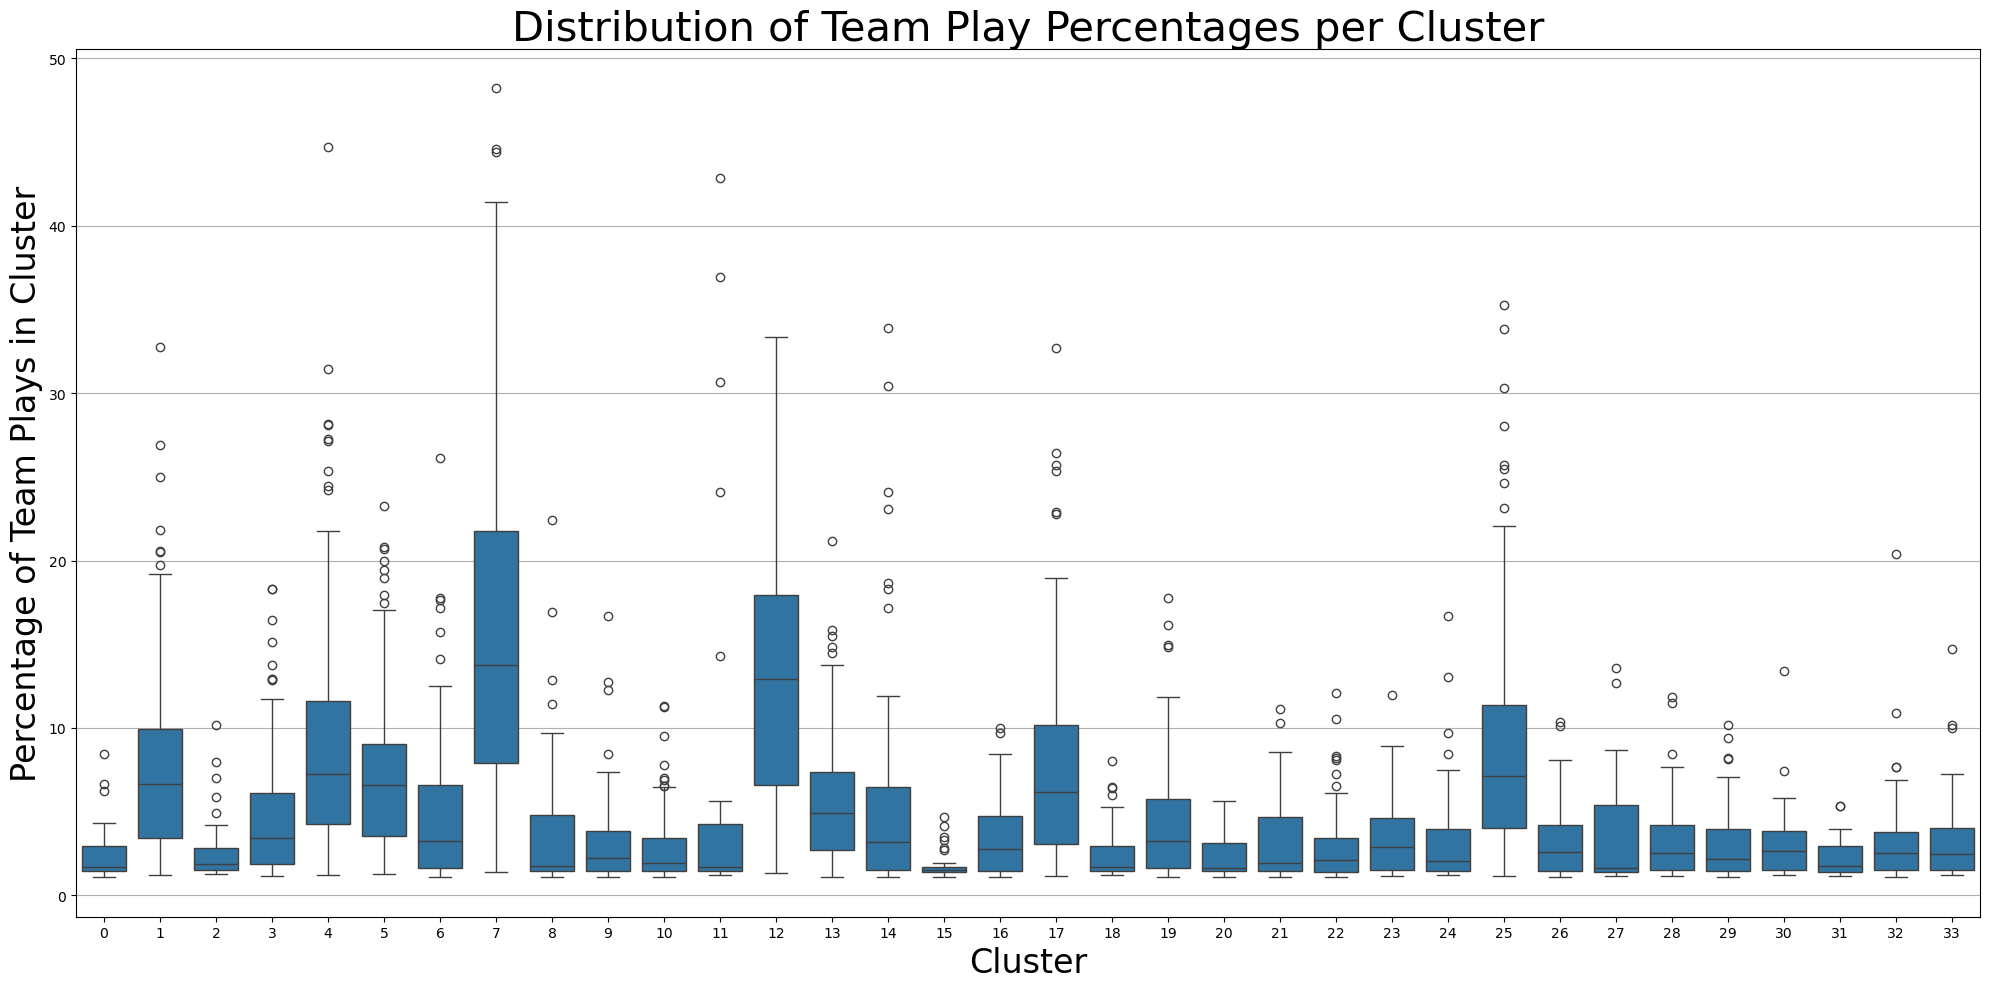

In [945]:
plt.figure(figsize=(20, 10))

# Create a boxplot showing the distribution of percentages per cluster
sns.boxplot(
    data=team_cluster_pct,
    x='kmeans_cluster',
    y='percentage'
)

plt.title('Distribution of Team Play Percentages per Cluster', fontsize=30)
plt.xlabel('Cluster', fontsize=24)
plt.ylabel('Percentage of Team Plays in Cluster', fontsize=24)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [170]:
team_play_counts = presnap_2022_with_ids['teamId'].value_counts()
mean_plays_per_team = team_play_counts.mean()
print(f"Average number of plays per team: {mean_plays_per_team:.2f}")

Average number of plays per team: 67.80


# t-SNE analysis

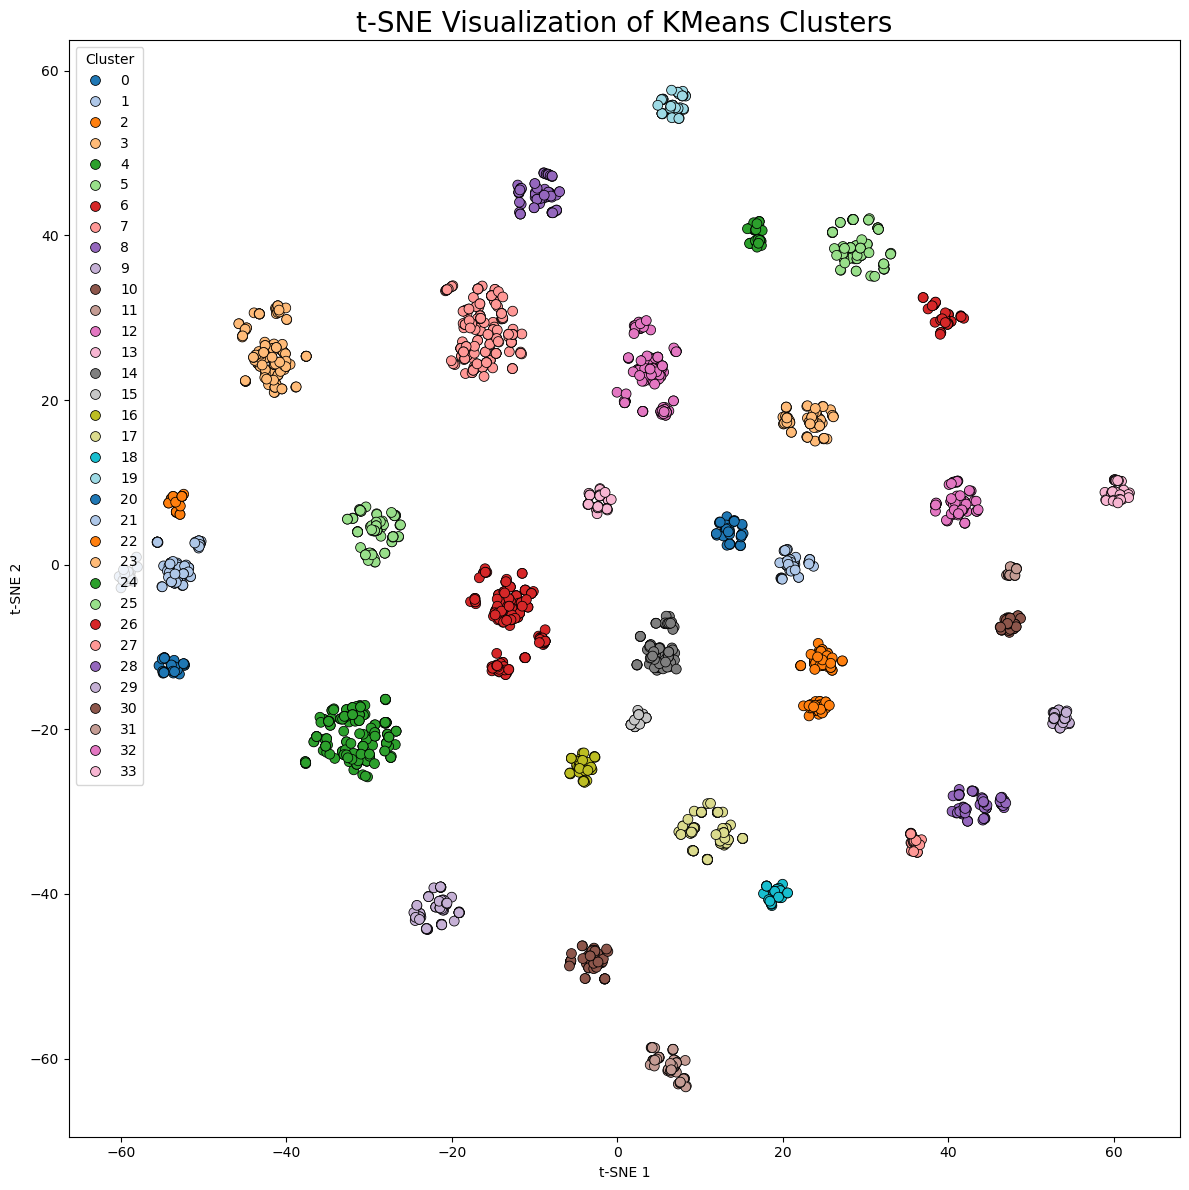

In [946]:
#categorical_features = [
    #'backFormation',
    #'receiverFormation'
#]

boolean_features = [
    'shotgun',
    'noHuddle',
    'wr_motion',
    'te_motion',
    'rb_motion',
    'has_twins',
    'has_trips',
    'has_quads',
    'has_bunch',
    'is_goal_line',
    'empty_back',
    'split_backs', 
    'Iform', 
    'full_house_backfield', 
    'singleback', 
    'pistol',
    'wildcat', 
    'wing', 
    'shotgun_rb', 
    'sniffer',
    'rb_split',
    'te_split'
]

features_to_scale = [
    'qb',
    'rb',
    'te',
    'wr',
    'ol',
    'spread_index', # leave in to contextualize the alignment features that might be read in vacuum
    'spread_balance',
    'tight_balance',
    'receivers_on_short_side'
]

from sklearn.preprocessing import MinMaxScaler

features_to_keep = boolean_features + features_to_scale
X = formations[features_to_keep].copy()

X[boolean_features] = X[boolean_features].astype(int)
#X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
scaler = MinMaxScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

optimal_k = 34
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_cluster = X.copy()
kmeans_labels = kmeans.fit_predict(X_cluster)

X['kmeans_cluster'] = kmeans_labels

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 12))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X['kmeans_cluster'], palette='tab20', s=50, edgecolor='k')
plt.title("t-SNE Visualization of KMeans Clusters", fontsize=20)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.colors
import seaborn as sns
import matplotlib.patheffects as path_effects

# Step 1: Create base tsne DataFrame
X_tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
X_tsne_df['kmeans_cluster'] = kmeans_labels

# Step 2: Define a placeholder palette map
feature_palette_map = {
    'shotgun': ['blue', 'orange'],
    'noHuddle': ['blue', 'orange'],
    'wr_motion': ['blue', 'orange'],
    'te_motion': ['blue', 'orange'],
    'rb_motion': ['blue', 'orange'],
    'rb_split': ['blue', 'orange'],
    'te_split': ['blue', 'orange'],
    'empty_backfield_on_hash': ['blue', 'orange'],
    'has_twins': ['blue', 'orange'],
    'has_trips': ['blue', 'orange'],
    'has_quads': ['blue', 'orange'],
    'has_bunch': ['blue', 'orange'],
    'is_goal_line': ['blue', 'orange'],
    'empty_back': ['blue', 'orange'],
    'split_backs': ['blue', 'orange'],
    'Iform': ['blue', 'orange'],
    'full_house_backfield': ['blue', 'orange'],
    'singleback': ['blue', 'orange'],
    'pistol': ['blue', 'orange'],
    'wildcat': ['blue', 'orange'],
    'wing': ['blue', 'orange'],
    'shotgun_rb': ['blue', 'orange'],
    'sniffer': ['blue', 'orange'],
    'special': ['blue', 'orange'],
    'heavy': ['blue', 'orange'],
    'spread_balance': 'coolwarm',
    'field_mismatch': 'coolwarm',
    'tight_balance': 'coolwarm',
    'personnel': 'tab10'
}

# Step 3: Iterate through all features in `formations`
for feature in formations.columns:
    # Add the feature to the tsne dataframe
    X_tsne_df[feature] = formations[feature].values

    palette = feature_palette_map.get(feature, 'Reds')

    plt.figure(figsize=(12, 12))
    sns.scatterplot(
        x='tsne_1',
        y='tsne_2',
        hue=feature,
        data=X_tsne_df,
        palette=palette,
        s=50,
        edgecolor='k'
    )

    # Add cluster centroids
    centroids = X_tsne_df.groupby('kmeans_cluster')[['tsne_1', 'tsne_2']].mean()
    for cluster_id, (x, y) in centroids.iterrows():
        txt = plt.text(
            x, y, str(cluster_id),
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center',
            color='white'
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()
        ])

    plt.title(f"t-SNE Visualization Colored by '{feature}'", fontsize=16)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend(title=feature)
    plt.tight_layout()
    plt.show()

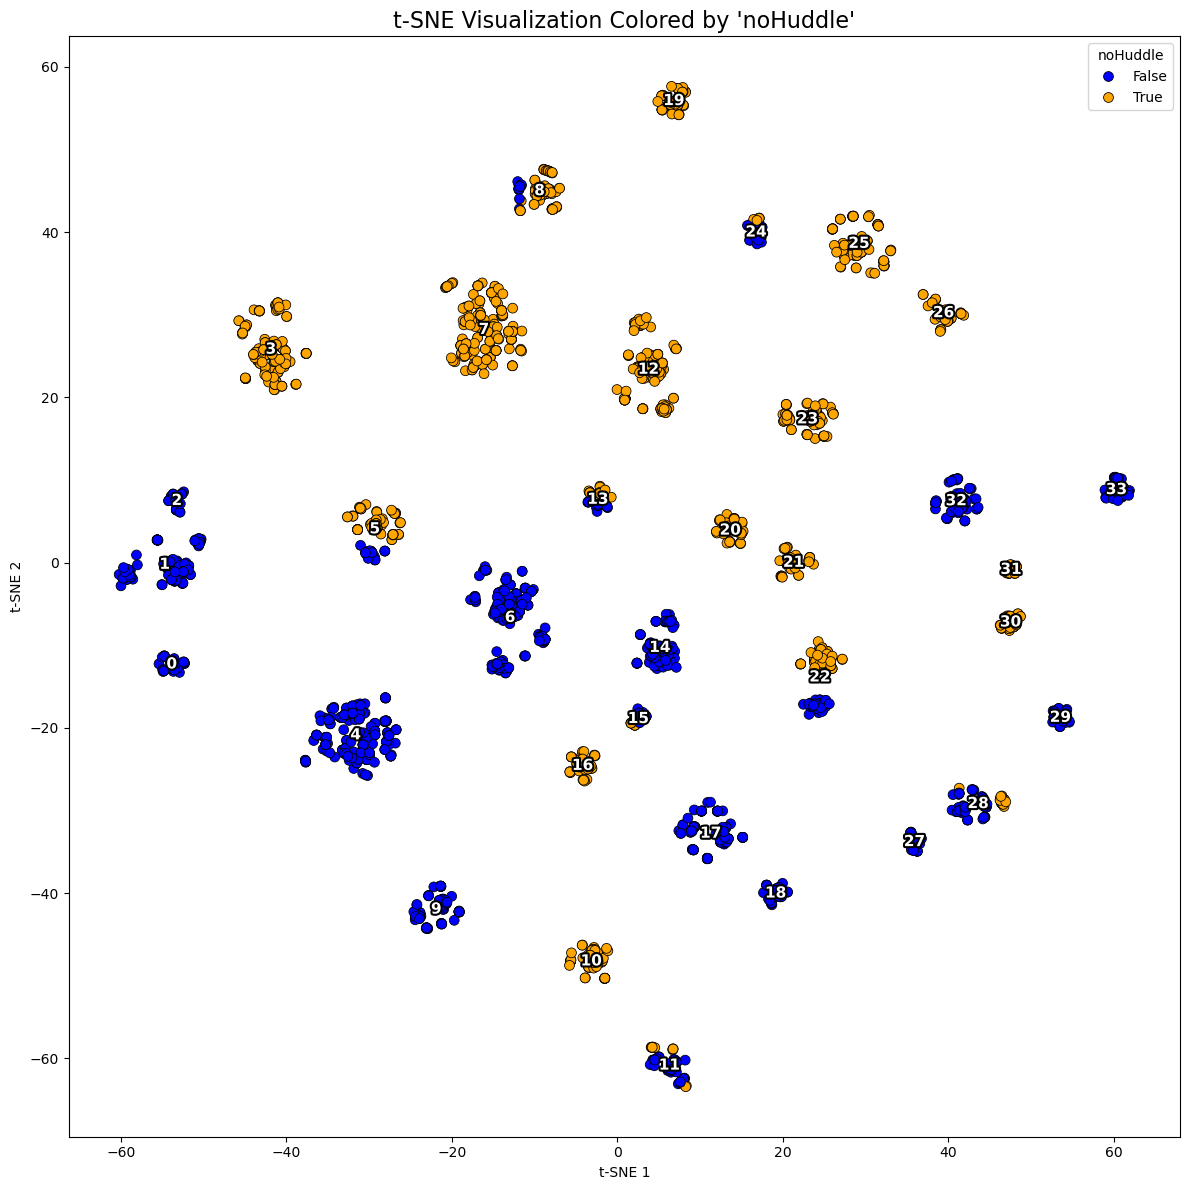

In [948]:
def plot_tsne_feature(feature, palette='Reds'):
    # Add the feature to the tsne dataframe
    X_tsne_df[feature] = formations[feature].values

    if isinstance(palette, str):
        palette = feature_palette_map.get(feature, palette)

    plt.figure(figsize=(12, 12))
    sns.scatterplot(
        x='tsne_1',
        y='tsne_2',
        hue=feature,
        data=X_tsne_df,
        palette=palette,
        s=50,
        edgecolor='k'
    )

    # Add cluster centroids
    centroids = X_tsne_df.groupby('kmeans_cluster')[['tsne_1', 'tsne_2']].mean()
    for cluster_id, (x, y) in centroids.iterrows():
        txt = plt.text(
            x, y, str(cluster_id),
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center',
            color='white'
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()
        ])

    plt.title(f"t-SNE Visualization Colored by '{feature}'", fontsize=16)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend(title=feature)
    plt.tight_layout()
    plt.show()

# Generate only the plots you want
plot_tsne_feature('noHuddle', palette='coolwarm')

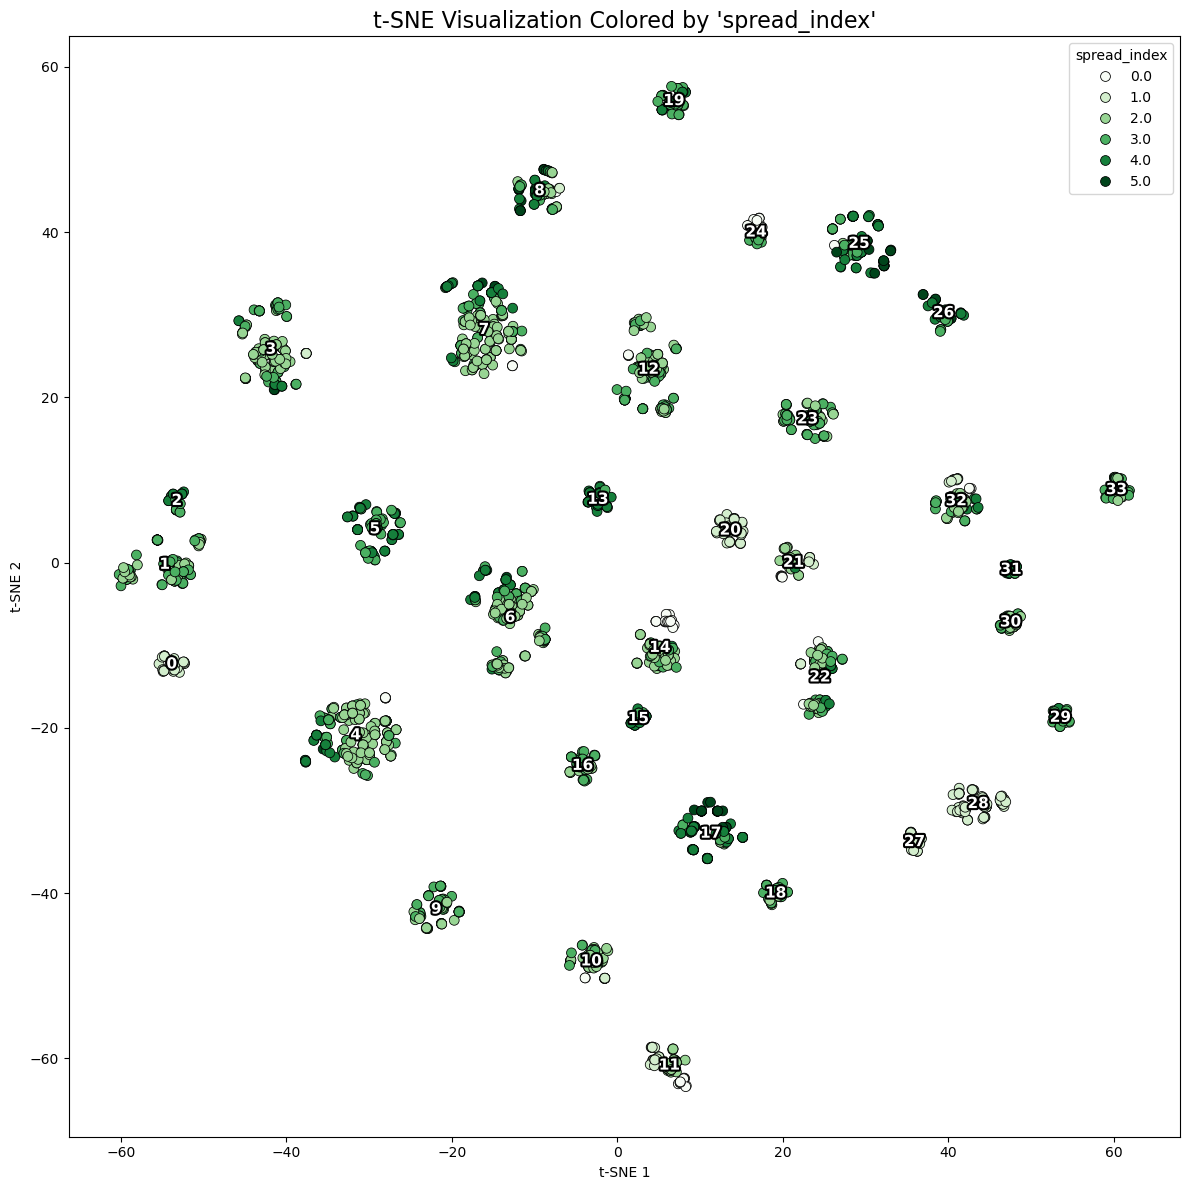

In [949]:
plot_tsne_feature('spread_index', palette='Greens')

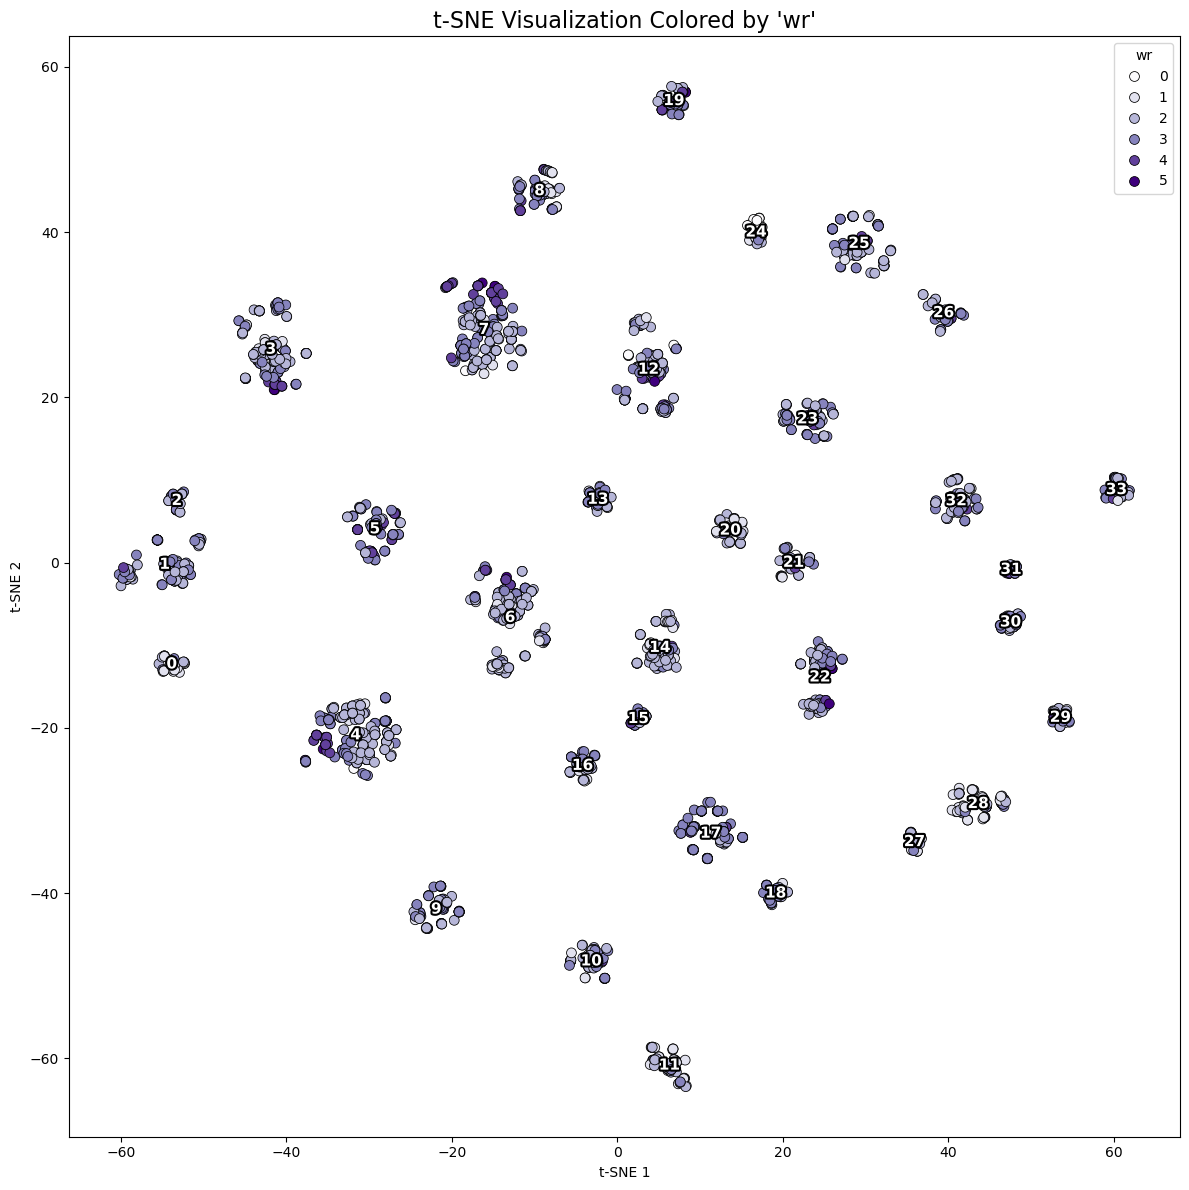

In [951]:
plot_tsne_feature('wr', palette='Purples')

# Initial Anlysis after Merging in FormationId

In [988]:
clustered_presnap = pd.read_csv('presnap_with_formationId.csv')

C:\Users\lehma\AppData\Local\Temp\ipykernel_17124\1214770822.py:1: DtypeWarning:

Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.



In [989]:
overlap = set(clustered_presnap.columns).intersection(plays_2022.columns)
overlap.difference_update({'eventId', 'gameId'})

plays_clean = plays_2022.drop(columns=overlap)

clustered_pbp = clustered_presnap.merge(plays_clean, on=['gameId', 'eventId'], how='inner')

In [990]:
clustered_pbp.shape

(11255, 159)

In [991]:
print(list(clustered_pbp.columns))

['season', 'week', 'gameId', 'eventId', 'teamId', 'qb', 'rb', 'wr', 'te', 'ol', 'blockingSchemeType', 'blownBlockPlayer', 'blownBlockPlayer2', 'blownBlockPlayer3', 'shotgun', 'noHuddle', 'abortedSnap', 'snapper', 'playAction', 'readOption', 'backFormation', 'receiverFormation', 'formationCode', 'lastUpdate', 'badSnap', 'badCatch', 'hash', 'wr_motion', 'te_motion', 'rb_motion', 'wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right', 'personnel', 'has_twins', 'has_trips', 'has_quads', 'has_bunch', 'has_tight_slot', 'is_all_tight', 'is_goal_line', 'is_fake_or_aborted_fg_or_punt', 'empty_back', 'split_backs', 'Iform', 'full_house_backfield', 'singleback', 'pistol', 'wildcat', 'wing', 'shotgun_rb', 'sniffer', 'heavy', 'empty_backfield', 'rb_split', 'te_split', 'receivers_left', 'receivers_right', 'special', 'receivers_on_short_side', 'spread_index', 'te_spread_index', 'rb_spread_index', 'heavy_index', 'te_heavy_index', 'tight_balance', 'spread_balance', 'motion_lo

In [996]:
filtered = clustered_pbp[
    (clustered_pbp['down'] == 3) &
    (clustered_pbp['quarter'] == 4) &
    (clustered_pbp['scoreGap'].abs() <= 6)
].copy()

total_filtered = len(filtered)
cluster_counts = filtered['kmeans_cluster'].value_counts()

cluster_percentages = cluster_counts / total_filtered * 100
filtered['successful'] = (filtered['firstDown'] == 1) | (filtered['touchdown'] == 1)
conversion_rates = filtered.groupby('kmeans_cluster')['successful'].mean() * 100
avg_to_go = filtered.groupby('kmeans_cluster')['toGo'].mean()

summary = pd.DataFrame({
    'count': cluster_counts,
    'usage_pct': cluster_percentages,
    'conversion_pct': conversion_rates,
    'avg_to_go': avg_to_go
}).sort_values('count', ascending=False)

summary = summary.round({
    'usage_pct': 1,
    'conversion_pct': 1,
    'avg_to_go': 1
})

print(total_filtered)
print(summary)

108
                count  usage_pct  conversion_pct  avg_to_go
kmeans_cluster                                             
13                 13       12.0            23.1       10.7
17                 12       11.1            25.0       10.5
1                  12       11.1            58.3        4.9
5                  10        9.3            30.0        7.7
25                  9        8.3            33.3        6.6
4                   9        8.3            44.4        9.7
7                   9        8.3            33.3        6.3
19                  5        4.6            40.0        4.4
26                  5        4.6            80.0        4.6
12                  4        3.7            75.0        3.5
9                   3        2.8            33.3        8.3
16                  3        2.8            33.3        6.3
6                   2        1.9            50.0        7.0
27                  2        1.9            50.0        3.0
24                  1        0.9    

In [993]:
representative_rows_wo_personnel['kmeans_cluster'] = range(kmeans.n_clusters)

C:\Users\lehma\AppData\Local\Temp\ipykernel_17124\3327640216.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

